In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_duos = pd.read_csv('enemy-runs/pairs_logs.txt')
df_trios = pd.read_csv('enemy-runs/trios_logs.txt')
df_group = pd.read_csv('enemy-runs/groups_logs.txt')

df = pd.concat([df_duos, df_trios, df_group])

df.head()

,set of enemies,run id,gen,train_max.fitness,train_mean.fitness,train_min.fitness,train_std.fitness,train_max.gain,train_mean.gain,train_min.gain,train_std.gain,test_max.fitness,test_mean.fitness,test_min.fitness,test_std.fitness,test_max.gain,test_mean.gain,test_min.gain,test_std.gain
0,6 8,05:20,0,12.566278,-3.134515,-6.369901,4.986294,0.0,-82.25,-100.0,32.900418,11.713577,-5.409707,-17.492928,5.243064,-22.305935,-84.277094,-118.967284,33.738090
1,6 8,05:20,1,21.219256,3.977506,-5.117994,5.503983,0.0,-82.25,-100.0,32.900418,17.557573,-1.236392,-13.046607,6.593210,-10.425681,-45.727595,-94.107411,23.894492
2,6 8,05:20,2,48.450924,9.844681,3.575050,8.226072,0.0,-82.25,-100.0,32.900418,26.265399,3.638989,-13.046607,8.603613,-10.191217,-37.900792,-87.942811,16.738142
3,6 8,05:20,3,65.734699,16.789052,12.185869,10.722932,0.0,-82.25,-100.0,32.900418,26.265399,10.493719,-4.866819,6.495664,-10.191217,-26.900365,-48.504125,7.411426
4,6 8,05:20,4,65.734699,19.753042,12.597323,11.298710,0.0,-82.25,-100.0,32.900418,26.265399,10.245172,-4.866819,7.598199,-6.378481,-25.985164,-48.584680,9.349557


In [4]:
ALL_UNIQUE_ENEMIES = df['set of enemies'].unique()


# Duos

In [5]:
metrics = ['train_max.fitness', 'train_mean.fitness', 'train_min.fitness', 'train_std.fitness',
           'train_max.gain', 'train_mean.gain', 'train_min.gain', 'train_std.gain',
           'test_max.fitness', 'test_mean.fitness', 'test_min.fitness', 'test_std.fitness',
           'test_max.gain', 'test_mean.gain', 'test_min.gain', 'test_std.gain']

end_result_df = df_duos.groupby(['set of enemies', 'run id'])[metrics].last().reset_index(drop=False)

end_result_df

,set of enemies,run id,train_max.fitness,train_mean.fitness,train_min.fitness,train_std.fitness,train_max.gain,train_mean.gain,train_min.gain,train_std.gain,test_max.fitness,test_mean.fitness,test_min.fitness,test_std.fitness,test_max.gain,test_mean.gain,test_min.gain,test_std.gain
0,1 2,29:31,75.206986,47.326854,39.253797,9.354719,0.0,-76.500,-100.0,35.394209,31.587670,7.275086,-4.079856,6.456999,-5.934840,-35.409512,-52.730836,8.821444
1,1 2,31:07,75.269900,62.204375,57.210040,6.652793,0.0,-86.000,-100.0,29.899833,34.919017,20.195779,7.675677,6.139190,-4.530233,-21.523274,-32.407424,5.764129
2,1 2,32:39,92.690612,64.179839,57.269900,9.143402,0.0,-72.000,-100.0,37.094474,32.700494,18.939991,7.268262,6.192935,-0.649293,-19.150027,-39.407027,8.334854
3,1 2,34:09,66.206986,45.770690,39.185869,8.501331,0.0,-78.000,-100.0,33.406586,25.602895,10.088570,-3.266252,6.945786,-8.040074,-33.915144,-55.672403,11.211837
4,1 2,35:43,75.269900,55.617887,47.815851,8.557368,0.0,-90.750,-100.0,24.329766,34.106260,11.841209,-7.690825,9.812915,-4.788134,-30.394019,-59.817880,10.740233
5,1 4,11:07,66.216175,40.731827,39.013548,5.258586,-40.0,-87.750,-100.0,17.533896,16.254210,7.453398,-4.884805,3.853398,-20.512783,-35.018301,-47.119959,8.352315
6,1 4,13:07,57.086497,38.487185,30.241098,4.393858,-50.0,-93.750,-100.0,12.386989,26.223624,7.048540,-3.457438,5.660912,-17.724900,-31.642123,-55.469455,8.792386
7,1 4,14:52,21.409013,21.274797,21.269900,0.023247,-60.0,-92.000,-100.0,12.688578,19.439901,13.573948,5.825338,1.827475,-23.416266,-25.394836,-38.917976,2.997382
8,1 4,16:15,39.013548,25.721790,21.316420,5.439318,-50.0,-89.000,-100.0,16.552945,18.231723,4.028177,-6.288956,5.857997,-18.149892,-40.772769,-54.552426,10.532374
9,1 4,17:45,39.269900,28.960906,21.405289,3.966501,0.0,-93.500,-100.0,17.399713,17.950366,8.097558,-1.217864,4.727840,-21.571839,-35.433180,-63.389743,9.281444


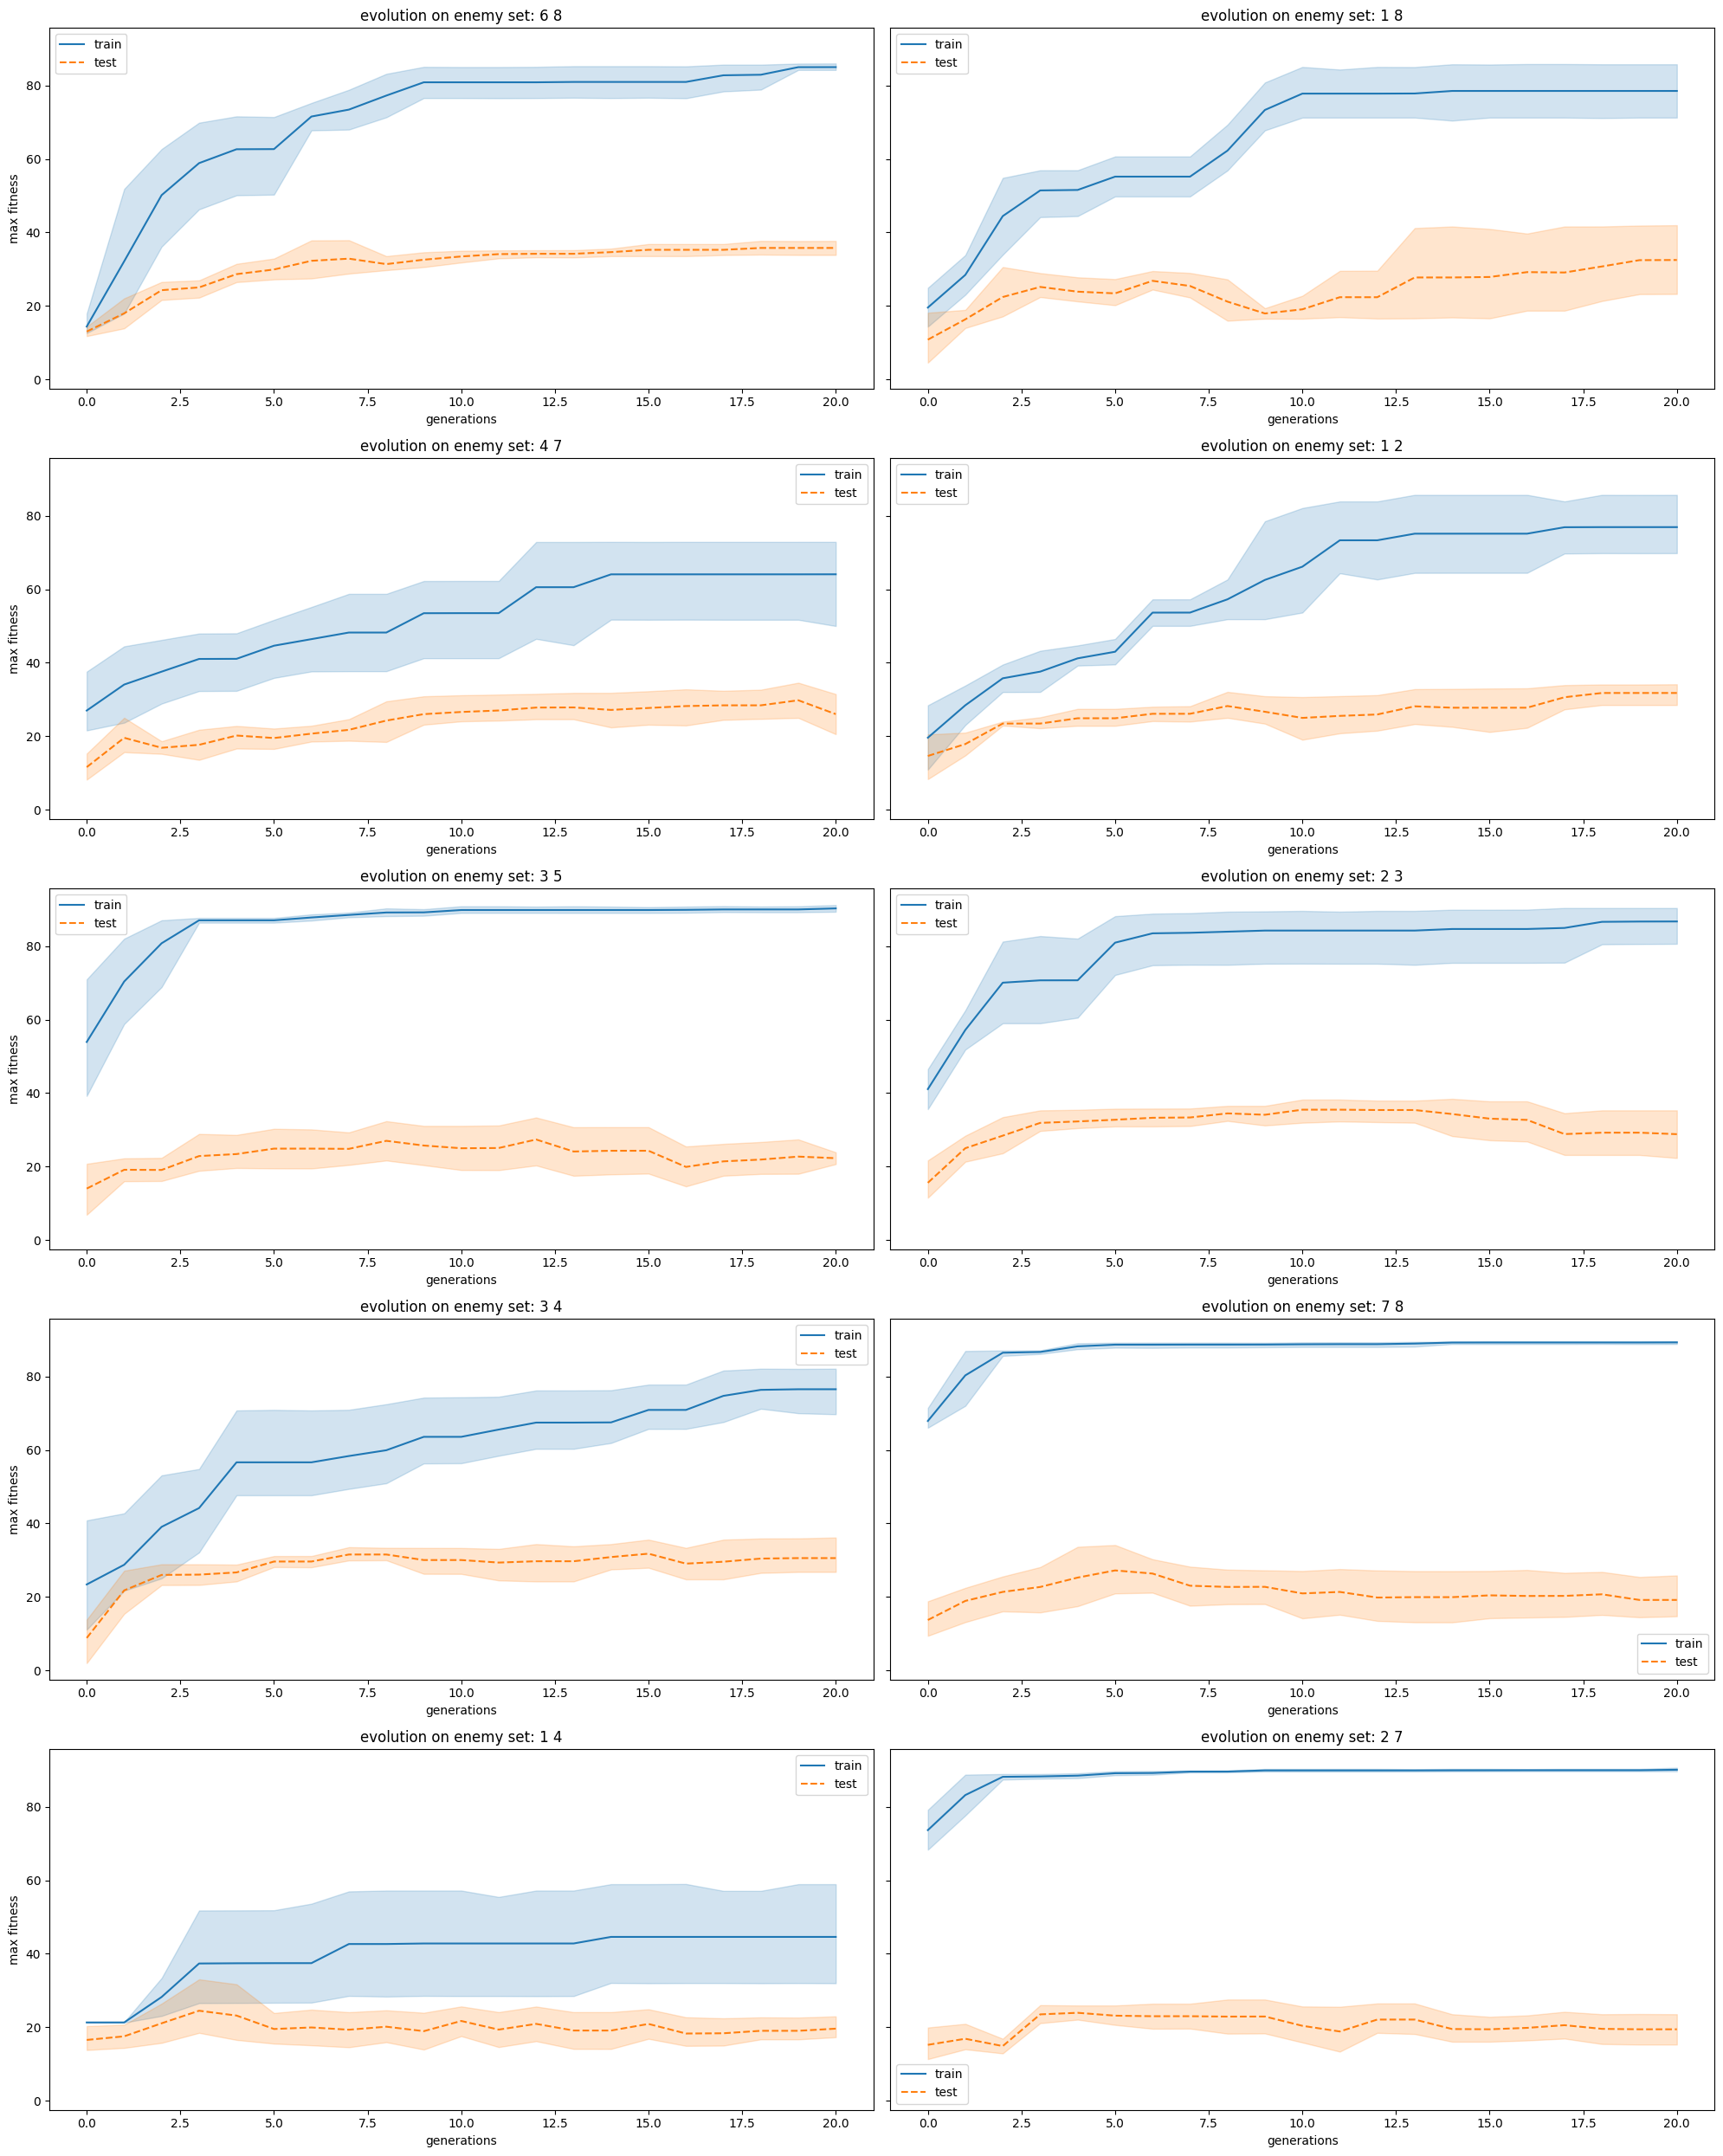

In [6]:
UNIQUE_ENEMIES = df_duos['set of enemies'].unique()

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(20, 25), sharey=True)

for i, e_set in enumerate(UNIQUE_ENEMIES):

    ax = axs[int(np.floor(i/2)), i % 2]

    enemy_data = df_duos[df_duos['set of enemies'] == e_set]

    sns.lineplot(ax = ax, data = enemy_data, x = 'gen', y='train_max.fitness', label = 'train')
    sns.lineplot(ax = ax, data = enemy_data, x = 'gen', y='test_max.fitness', label = 'test', linestyle = 'dashed')
    
    ax.set_title(f'evolution on enemy set: {e_set}')
    ax.set_ylabel('max fitness')
    ax.set_xlabel('generations')

plt.tight_layout()
plt.show()

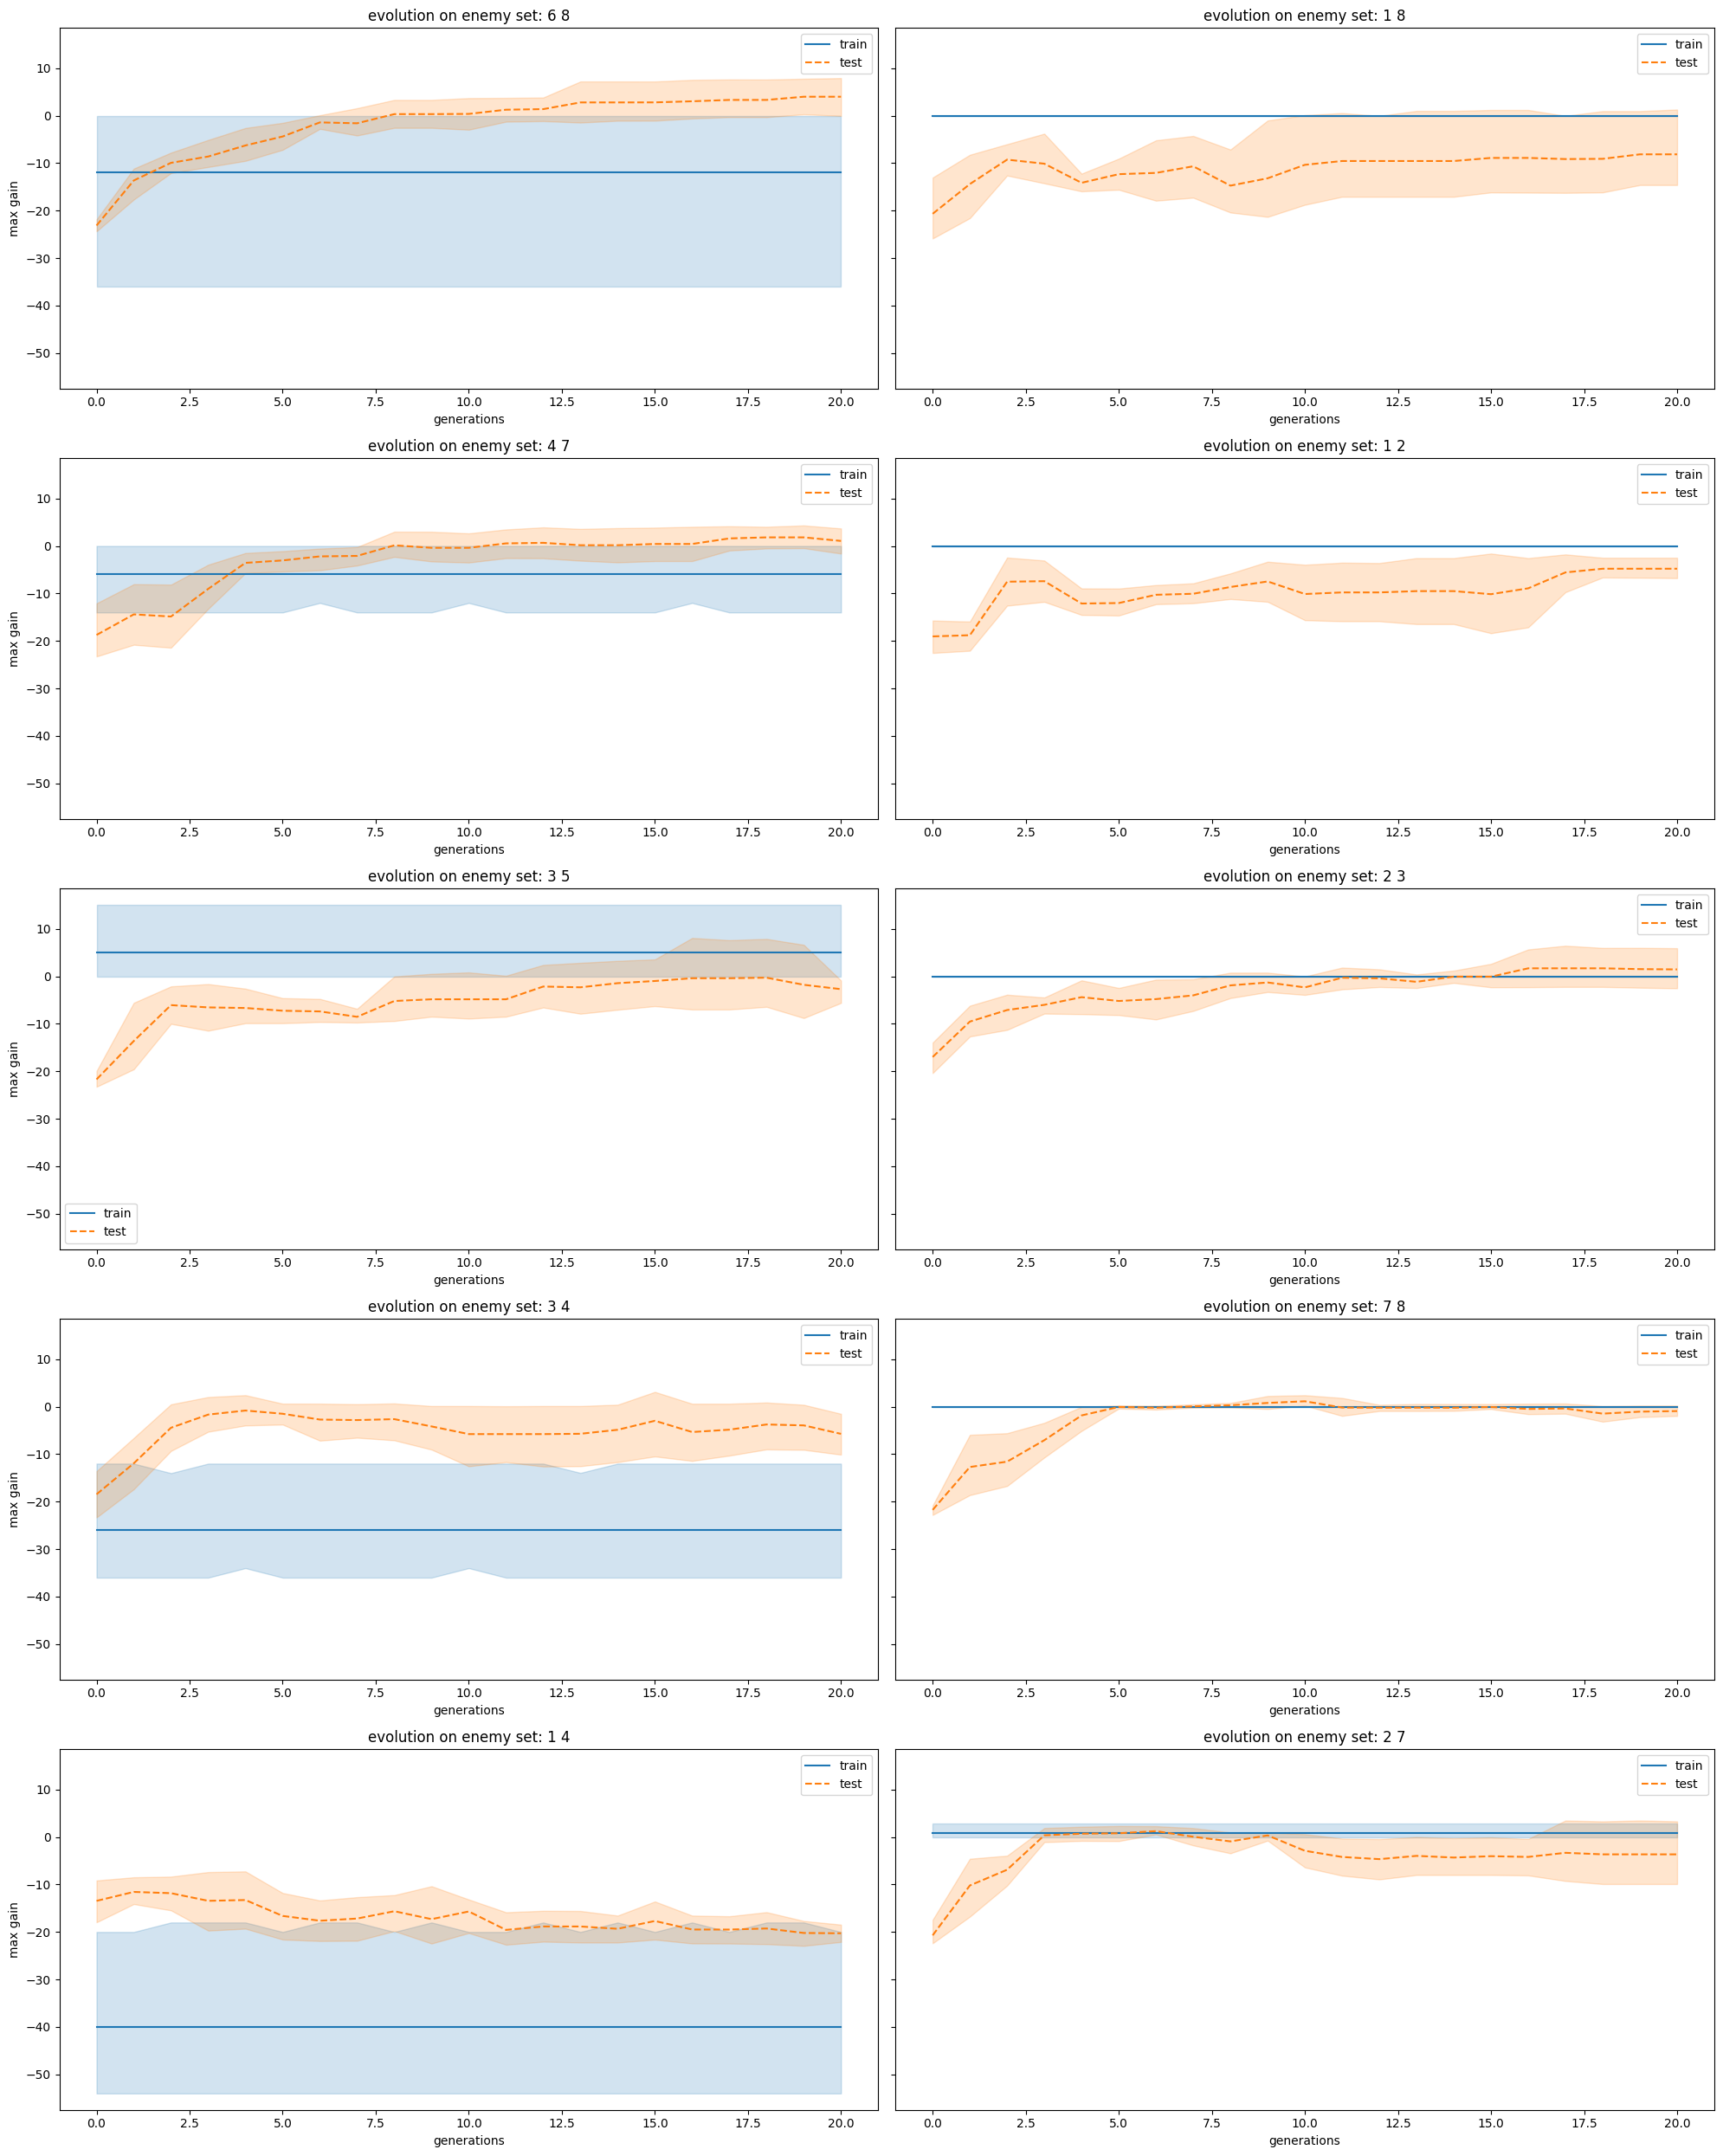

In [7]:
UNIQUE_ENEMIES = df_duos['set of enemies'].unique()

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(20, 25), sharey=True)

for i, e_set in enumerate(UNIQUE_ENEMIES):

    ax = axs[int(np.floor(i/2)), i % 2]

    enemy_data = df_duos[df_duos['set of enemies'] == e_set]

    sns.lineplot(ax = ax, data = enemy_data, x = 'gen', y='train_max.gain', label = 'train')
    sns.lineplot(ax = ax, data = enemy_data, x = 'gen', y='test_max.gain', label = 'test', linestyle = 'dashed')
    
    ax.set_title(f'evolution on enemy set: {e_set}')
    ax.set_ylabel('max gain')
    ax.set_xlabel('generations')

plt.tight_layout()
plt.show()

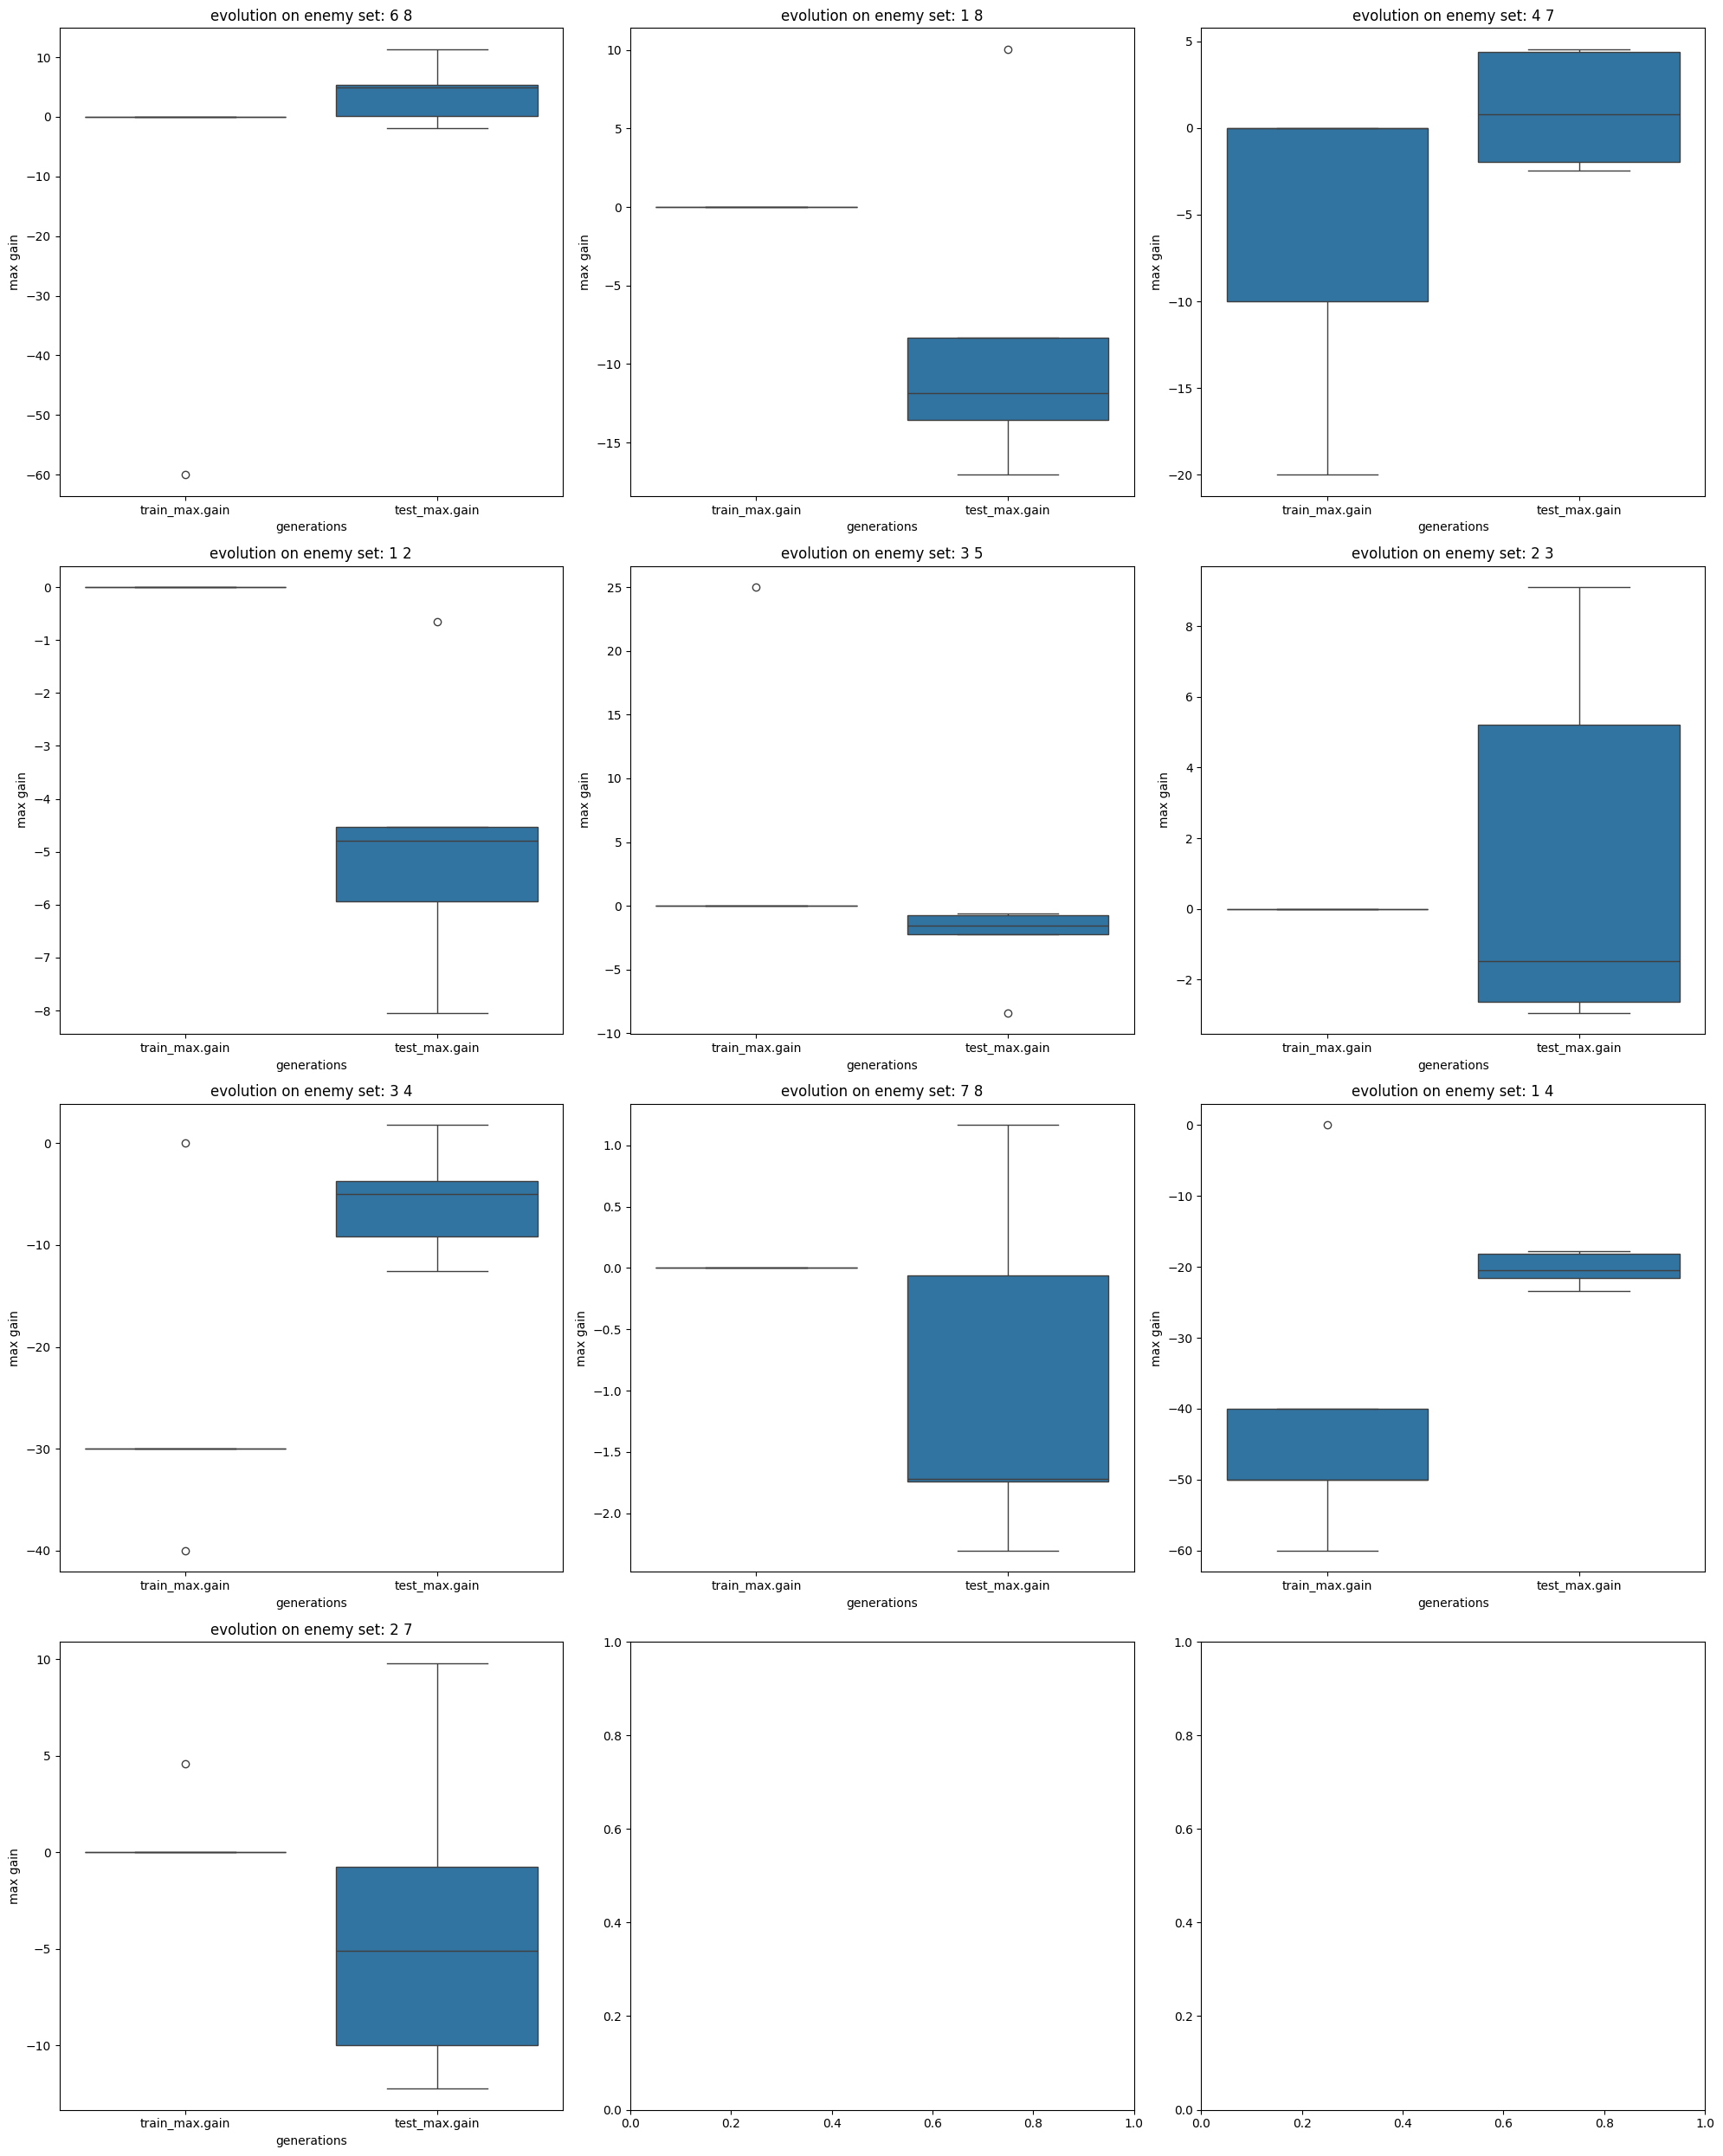

In [8]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20, 25))

for i, e_set in enumerate(UNIQUE_ENEMIES):

    ax = axs[int(np.floor(i/3)), i % 3]

    enemy_data = end_result_df[end_result_df['set of enemies'] == e_set]

    variable = ['train_max.gain', 'test_max.gain']
    values = pd.Series(enemy_data[variable].unstack().droplevel(-1))
    sns.boxplot(ax = ax, x = values.index, y = values)

    ax.set_title(f'evolution on enemy set: {e_set}')
    ax.set_ylabel('max gain')
    ax.set_xlabel('generations')

plt.tight_layout()
plt.show()

# Trios

In [9]:
metrics = ['train_max.fitness', 'train_mean.fitness', 'train_min.fitness', 'train_std.fitness',
           'train_max.gain', 'train_mean.gain', 'train_min.gain', 'train_std.gain',
           'test_max.fitness', 'test_mean.fitness', 'test_min.fitness', 'test_std.fitness',
           'test_max.gain', 'test_mean.gain', 'test_min.gain', 'test_std.gain']

end_result_df = df_trios.groupby(['set of enemies', 'run id'])[metrics].last().reset_index(drop=False)

end_result_df

,set of enemies,run id,train_max.fitness,train_mean.fitness,train_min.fitness,train_std.fitness,train_max.gain,train_mean.gain,train_min.gain,train_std.gain,test_max.fitness,test_mean.fitness,test_min.fitness,test_std.fitness,test_max.gain,test_mean.gain,test_min.gain,test_std.gain
0,1 2 5,10:16,91.918498,67.064365,56.887874,8.563486,-8.773825,-87.578544,-112.895849,34.891170,21.769999,9.948126,-2.055974,5.583316,-7.779723,-26.986166,-38.626229,6.914993
1,1 2 5,12:12,91.822389,70.614761,60.824966,6.683675,25.227761,-80.378514,-113.061534,40.905316,31.495431,20.898268,6.630805,7.142640,-5.203654,-20.521468,-35.426264,6.576033
2,1 2 5,14:04,78.409547,57.812106,46.769391,8.900608,19.773390,-80.068173,-112.481635,38.568296,32.185642,14.169318,3.899053,7.036897,-3.166238,-23.682092,-39.076133,8.263796
3,1 2 5,16:01,67.264708,48.952820,42.177955,6.016538,22.040619,-80.655495,-112.813006,40.238650,20.885574,8.711690,-0.897125,4.065033,-8.675946,-33.644890,-43.849015,7.426031
4,1 2 5,17:51,64.195264,46.196951,37.424750,6.955549,-6.294089,-86.548328,-113.061534,35.336814,22.903242,6.957174,-0.477492,4.697093,-16.195289,-33.174014,-43.648437,7.234279
5,1 4 8,00:08,50.810463,39.099993,28.799287,6.050785,-22.478730,-89.943601,-104.363050,20.794920,43.921998,17.630998,2.795103,9.503326,-11.437071,-26.895021,-44.389252,8.433442
6,1 4 8,02:07,48.377530,25.225025,23.039545,4.577904,-14.469163,-87.928974,-105.108634,23.286915,25.467427,13.619344,-0.704663,5.925853,-10.575509,-31.408295,-49.819559,10.909473
7,1 4 8,04:03,38.324887,24.656108,22.839681,3.125558,-21.522429,-90.294805,-101.546397,23.741418,19.999242,7.944984,0.765122,4.351278,-23.463032,-40.045982,-52.808207,6.441283
8,1 4 8,05:48,55.407604,45.267094,40.314701,3.787159,-19.165021,-87.526884,-105.108634,23.975235,22.652062,14.533414,-4.622824,6.591440,-8.889792,-22.478954,-58.538041,9.882157
9,1 4 8,08:16,52.873340,34.378990,27.557955,6.390965,-12.057936,-89.195306,-103.203252,19.511243,30.526690,14.566800,-4.907834,7.837933,-2.223929,-30.520546,-70.644338,15.038821


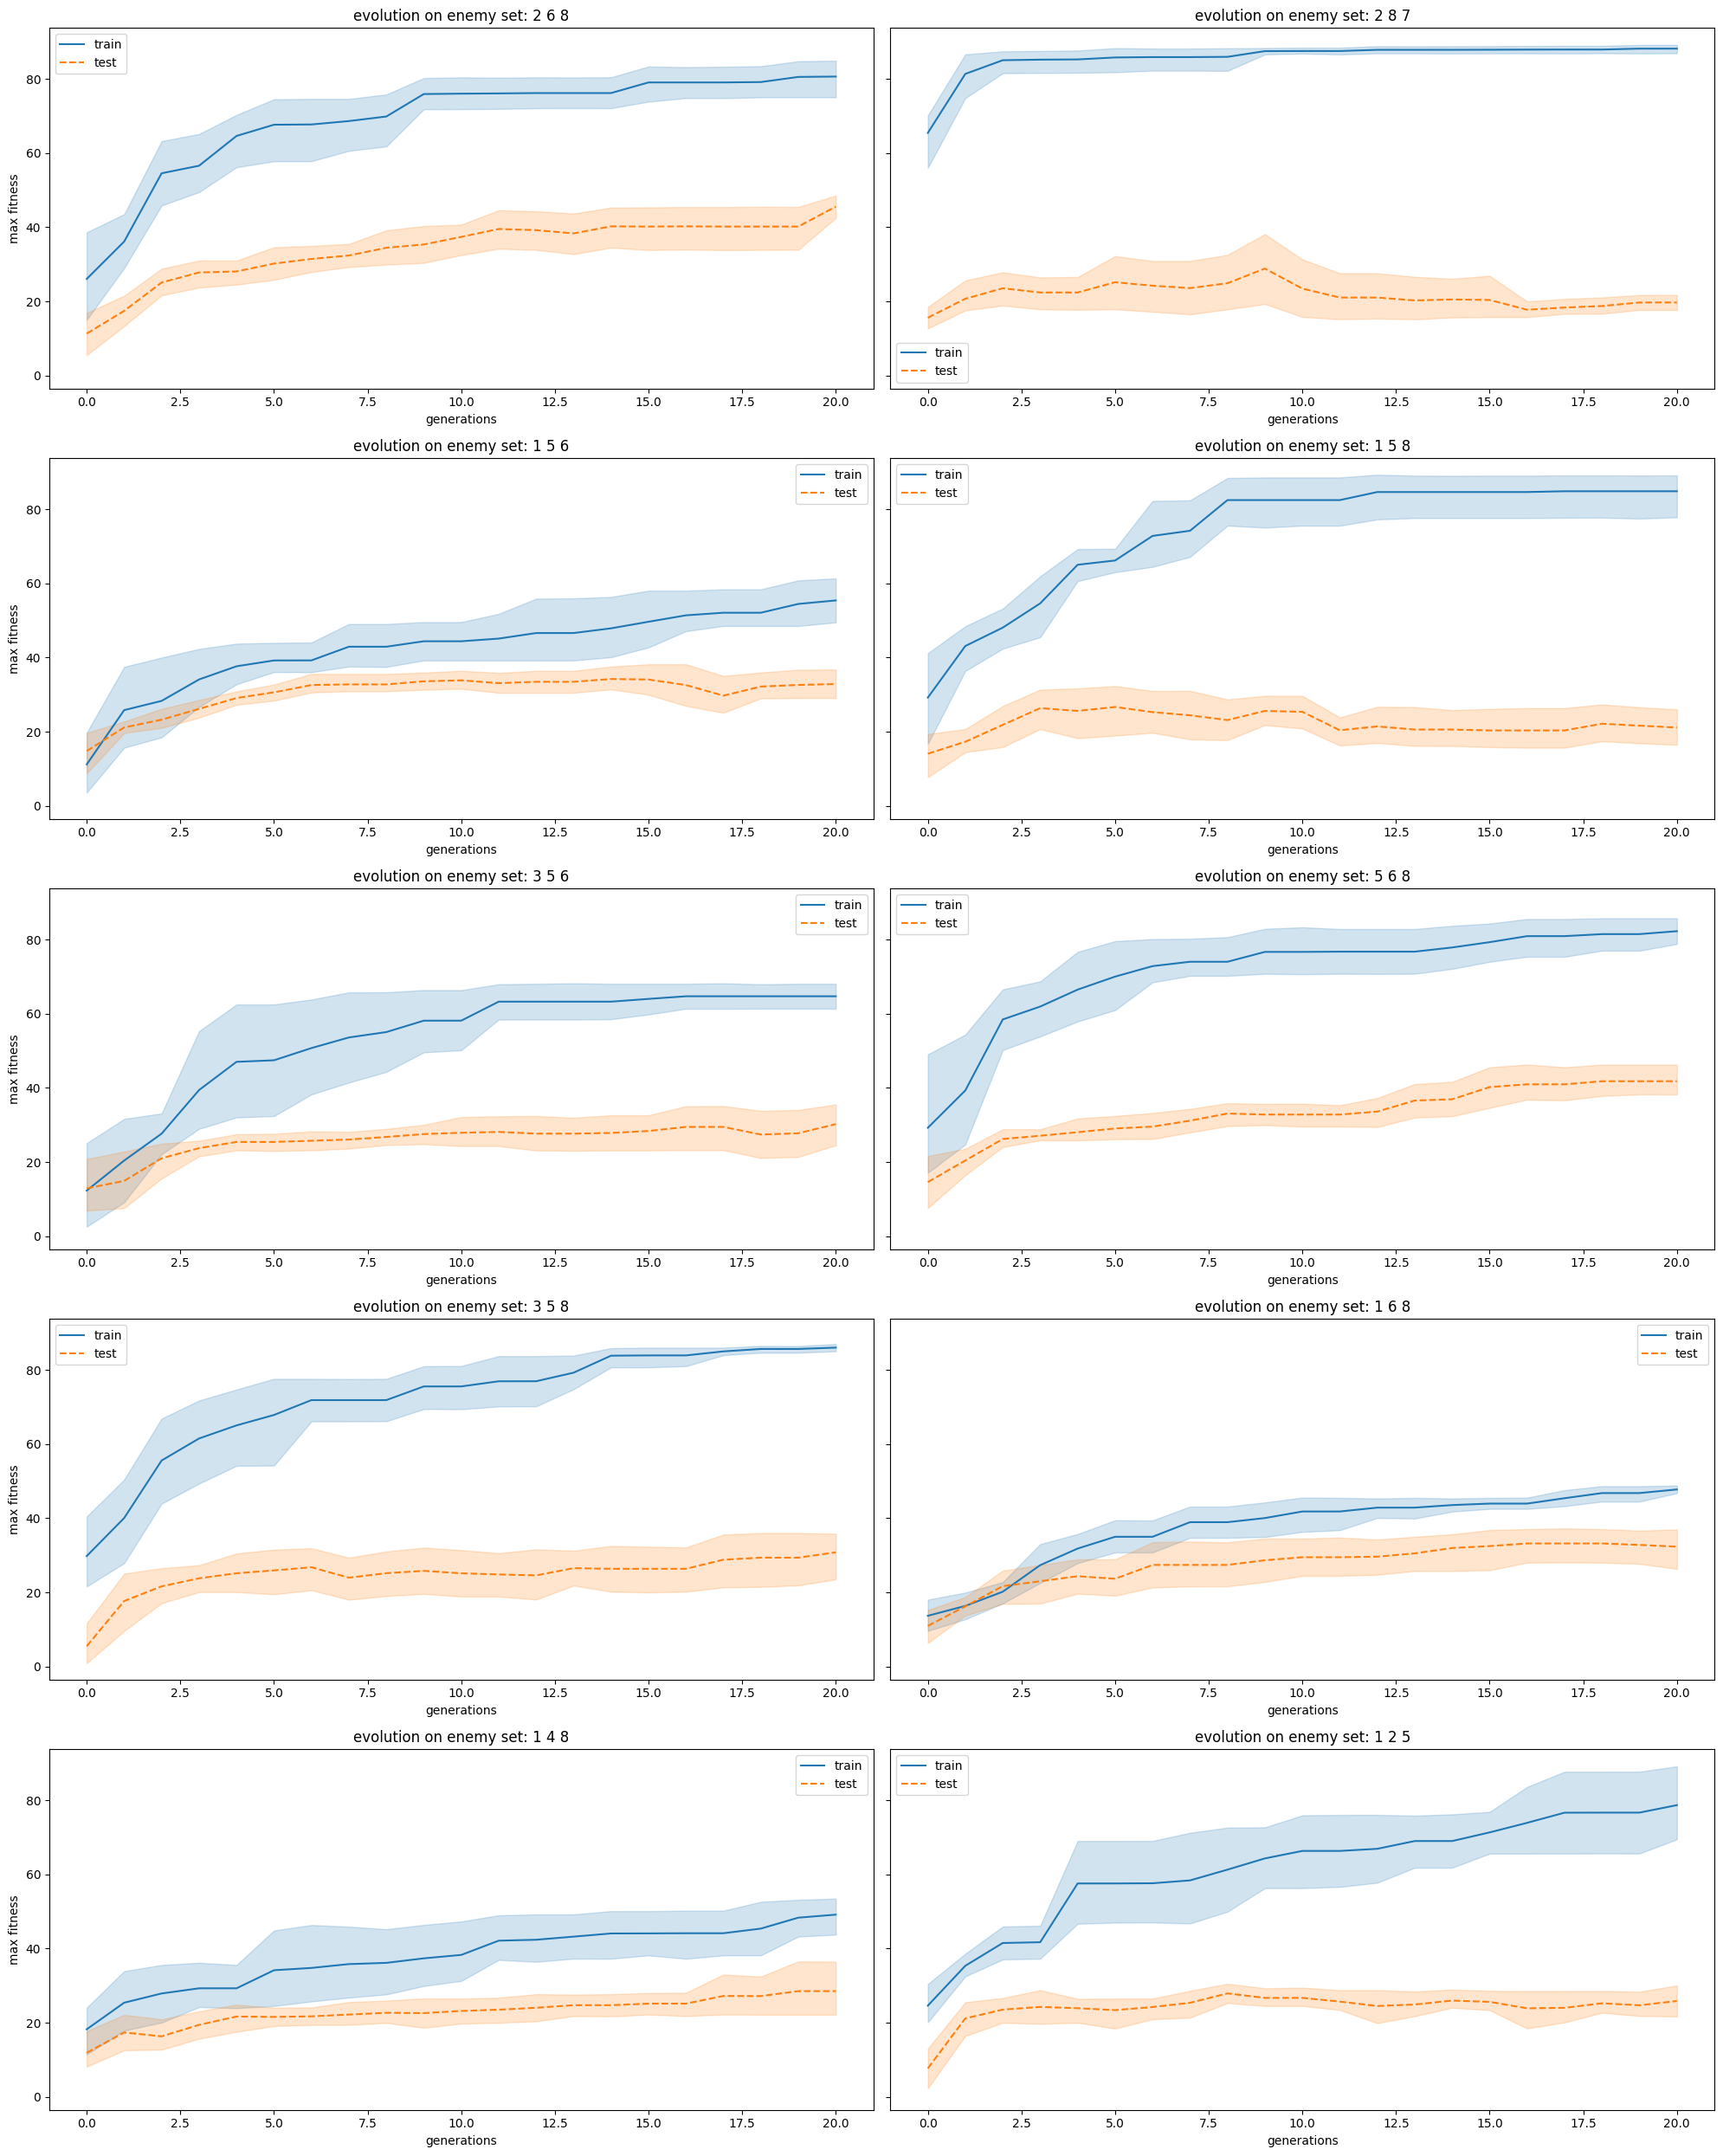

In [10]:
UNIQUE_ENEMIES = df_trios['set of enemies'].unique()

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(20, 25), sharey=True)

for i, e_set in enumerate(UNIQUE_ENEMIES):

    ax = axs[int(np.floor(i/2)), i % 2]

    enemy_data = df_trios[df_trios['set of enemies'] == e_set]

    sns.lineplot(ax = ax, data = enemy_data, x = 'gen', y='train_max.fitness', label = 'train')
    sns.lineplot(ax = ax, data = enemy_data, x = 'gen', y='test_max.fitness', label = 'test', linestyle = 'dashed')
    
    ax.set_title(f'evolution on enemy set: {e_set}')
    ax.set_ylabel('max fitness')
    ax.set_xlabel('generations')

plt.tight_layout()
plt.show()

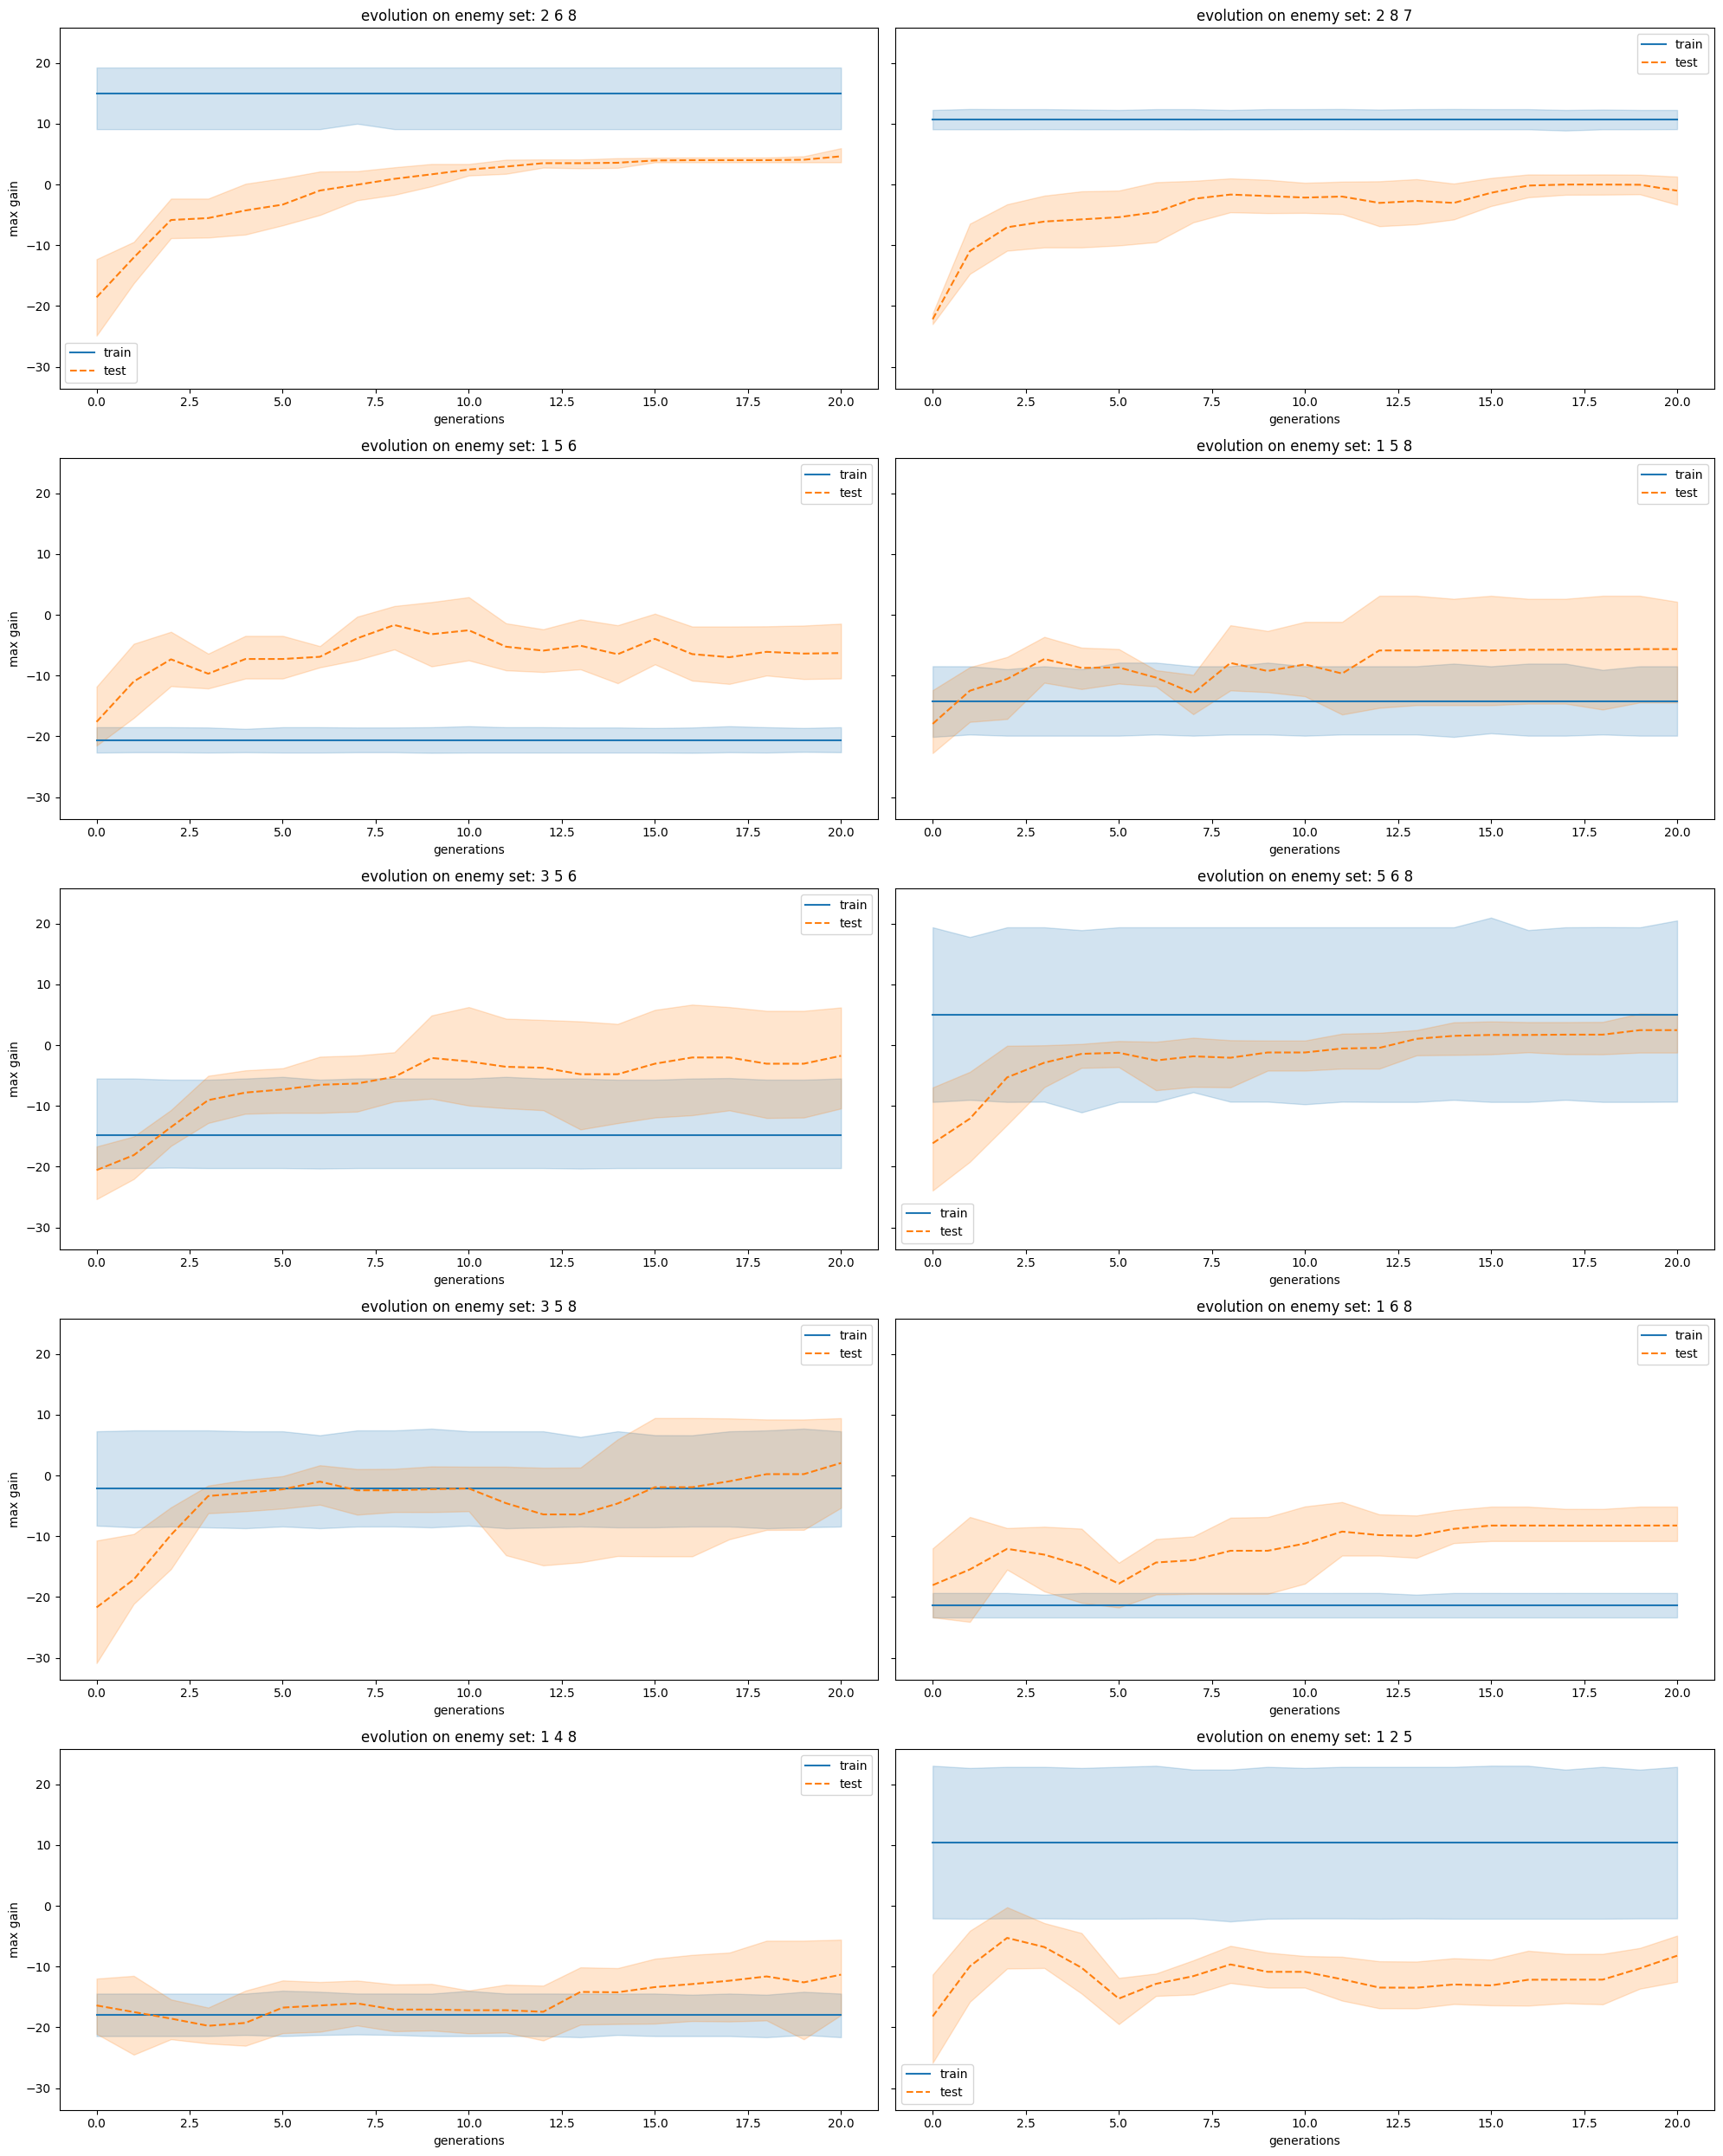

In [11]:
UNIQUE_ENEMIES = df_trios['set of enemies'].unique()

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(20, 25), sharey=True)

for i, e_set in enumerate(UNIQUE_ENEMIES):

    ax = axs[int(np.floor(i/2)), i % 2]

    enemy_data = df_trios[df_trios['set of enemies'] == e_set]

    sns.lineplot(ax = ax, data = enemy_data, x = 'gen', y='train_max.gain', label = 'train')
    sns.lineplot(ax = ax, data = enemy_data, x = 'gen', y='test_max.gain', label = 'test', linestyle = 'dashed')
    
    ax.set_title(f'evolution on enemy set: {e_set}')
    ax.set_ylabel('max gain')
    ax.set_xlabel('generations')

plt.tight_layout()
plt.show()

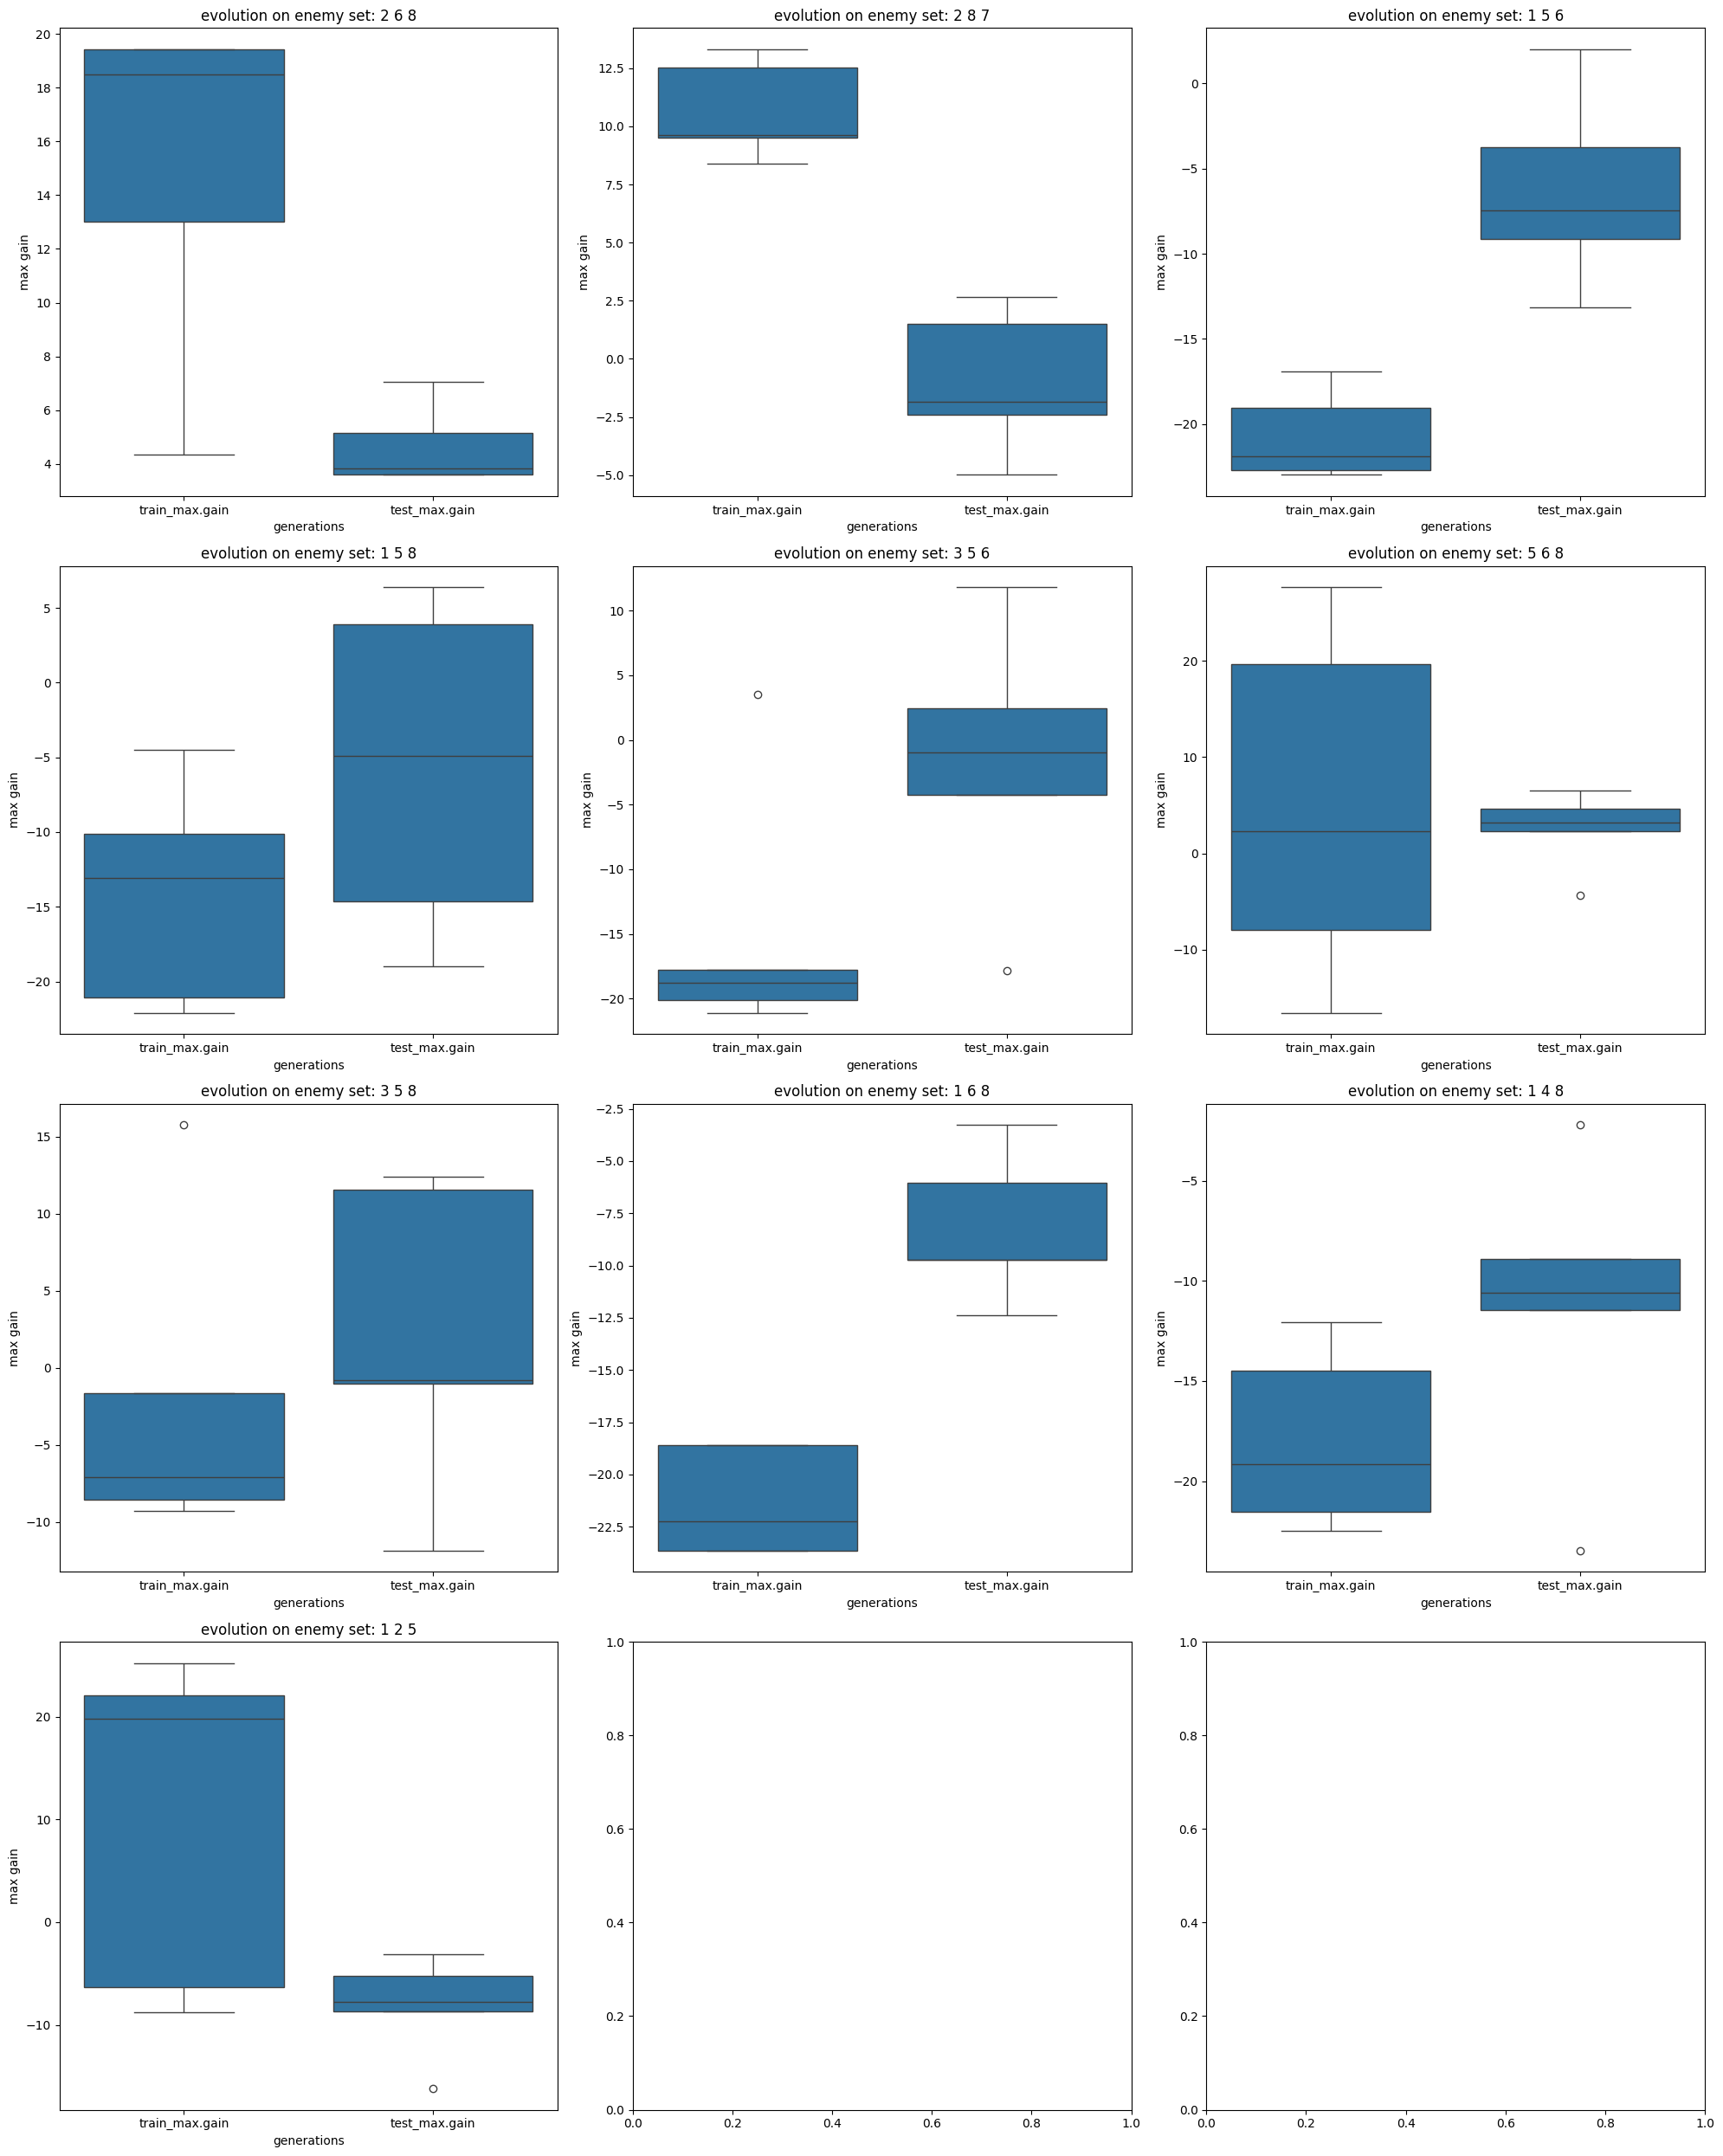

In [12]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20, 25))

for i, e_set in enumerate(UNIQUE_ENEMIES):

    ax = axs[int(np.floor(i/3)), i % 3]

    enemy_data = end_result_df[end_result_df['set of enemies'] == e_set]

    variable = ['train_max.gain', 'test_max.gain']
    values = pd.Series(enemy_data[variable].unstack().droplevel(-1))

    sns.boxplot(ax = ax, x = values.index, y = values)

    ax.set_title(f'evolution on enemy set: {e_set}')
    ax.set_ylabel('max gain')
    ax.set_xlabel('generations')

plt.tight_layout()
plt.show()

# Groups

In [13]:
metrics = ['train_max.fitness', 'train_mean.fitness', 'train_min.fitness', 'train_std.fitness',
           'train_max.gain', 'train_mean.gain', 'train_min.gain', 'train_std.gain',
           'test_max.fitness', 'test_mean.fitness', 'test_min.fitness', 'test_std.fitness',
           'test_max.gain', 'test_mean.gain', 'test_min.gain', 'test_std.gain']

end_result_df = df_group.groupby(['set of enemies', 'run id'])[metrics].last().reset_index(drop=False)

end_result_df

,set of enemies,run id,train_max.fitness,train_mean.fitness,train_min.fitness,train_std.fitness,train_max.gain,train_mean.gain,train_min.gain,train_std.gain,test_max.fitness,test_mean.fitness,test_min.fitness,test_std.fitness,test_max.gain,test_mean.gain,test_min.gain,test_std.gain
0,1 2 5 7,05:44,60.560938,48.372827,43.750167,5.175359,13.585925,-77.502080,-118.301270,42.994027,32.110024,15.722761,5.413756,6.036601,-7.006389,-19.030897,-29.649347,5.534610
1,1 2 5 7,07:51,80.543447,65.123522,53.078431,6.230014,-12.212672,-89.322637,-118.301270,34.794904,41.044550,24.037649,12.204934,5.775984,2.202486,-15.093744,-24.508579,6.837176
2,1 2 5 7,10:05,64.916636,48.233615,42.803614,4.613351,-0.202457,-90.585899,-117.422809,33.699451,38.360391,17.809852,5.392026,6.771641,-7.205443,-20.287326,-35.593918,5.922562
3,1 2 5 7,12:17,64.273277,49.021605,46.988225,3.882017,9.100643,-78.420317,-117.203194,39.745116,34.298668,20.776322,2.518365,6.687871,-4.035671,-19.536628,-24.106798,4.839631
4,1 2 5 7,14:32,42.973512,42.808896,42.720429,0.070903,2.575699,-89.691298,-116.544348,34.653577,30.784455,20.446426,9.744392,5.182613,-0.647960,-9.124478,-18.644726,4.493807
5,1 2 6 7,05:47,38.389471,30.680819,26.967532,2.821953,-14.688711,-84.376008,-100.000000,27.565572,29.375511,19.896344,8.707709,4.992523,3.521162,-13.430762,-31.547921,8.360399
6,1 2 6 7,07:47,45.265832,37.662916,35.949245,1.428965,-1.170285,-75.801331,-100.000000,35.467988,38.623913,26.352414,6.397261,7.224356,-2.556994,-14.918878,-22.744198,5.235374
7,1 2 6 7,09:48,40.359329,32.941482,29.065211,2.666912,-14.572188,-85.219209,-100.000000,25.516091,32.696540,24.687780,13.484332,5.313389,-5.796909,-14.981763,-23.324207,6.010005
8,1 2 6 7,11:51,41.737556,38.668665,37.546377,1.143830,-14.688711,-85.816030,-100.000000,26.385984,32.491250,30.017522,12.925765,4.098310,-1.815390,-10.008121,-21.120336,4.878411
9,1 2 6 7,13:59,39.294537,33.185016,29.063999,3.262676,-9.992958,-85.625648,-100.000000,27.191744,35.370183,26.390040,17.147477,5.333408,-8.045237,-15.333859,-23.324207,5.268036


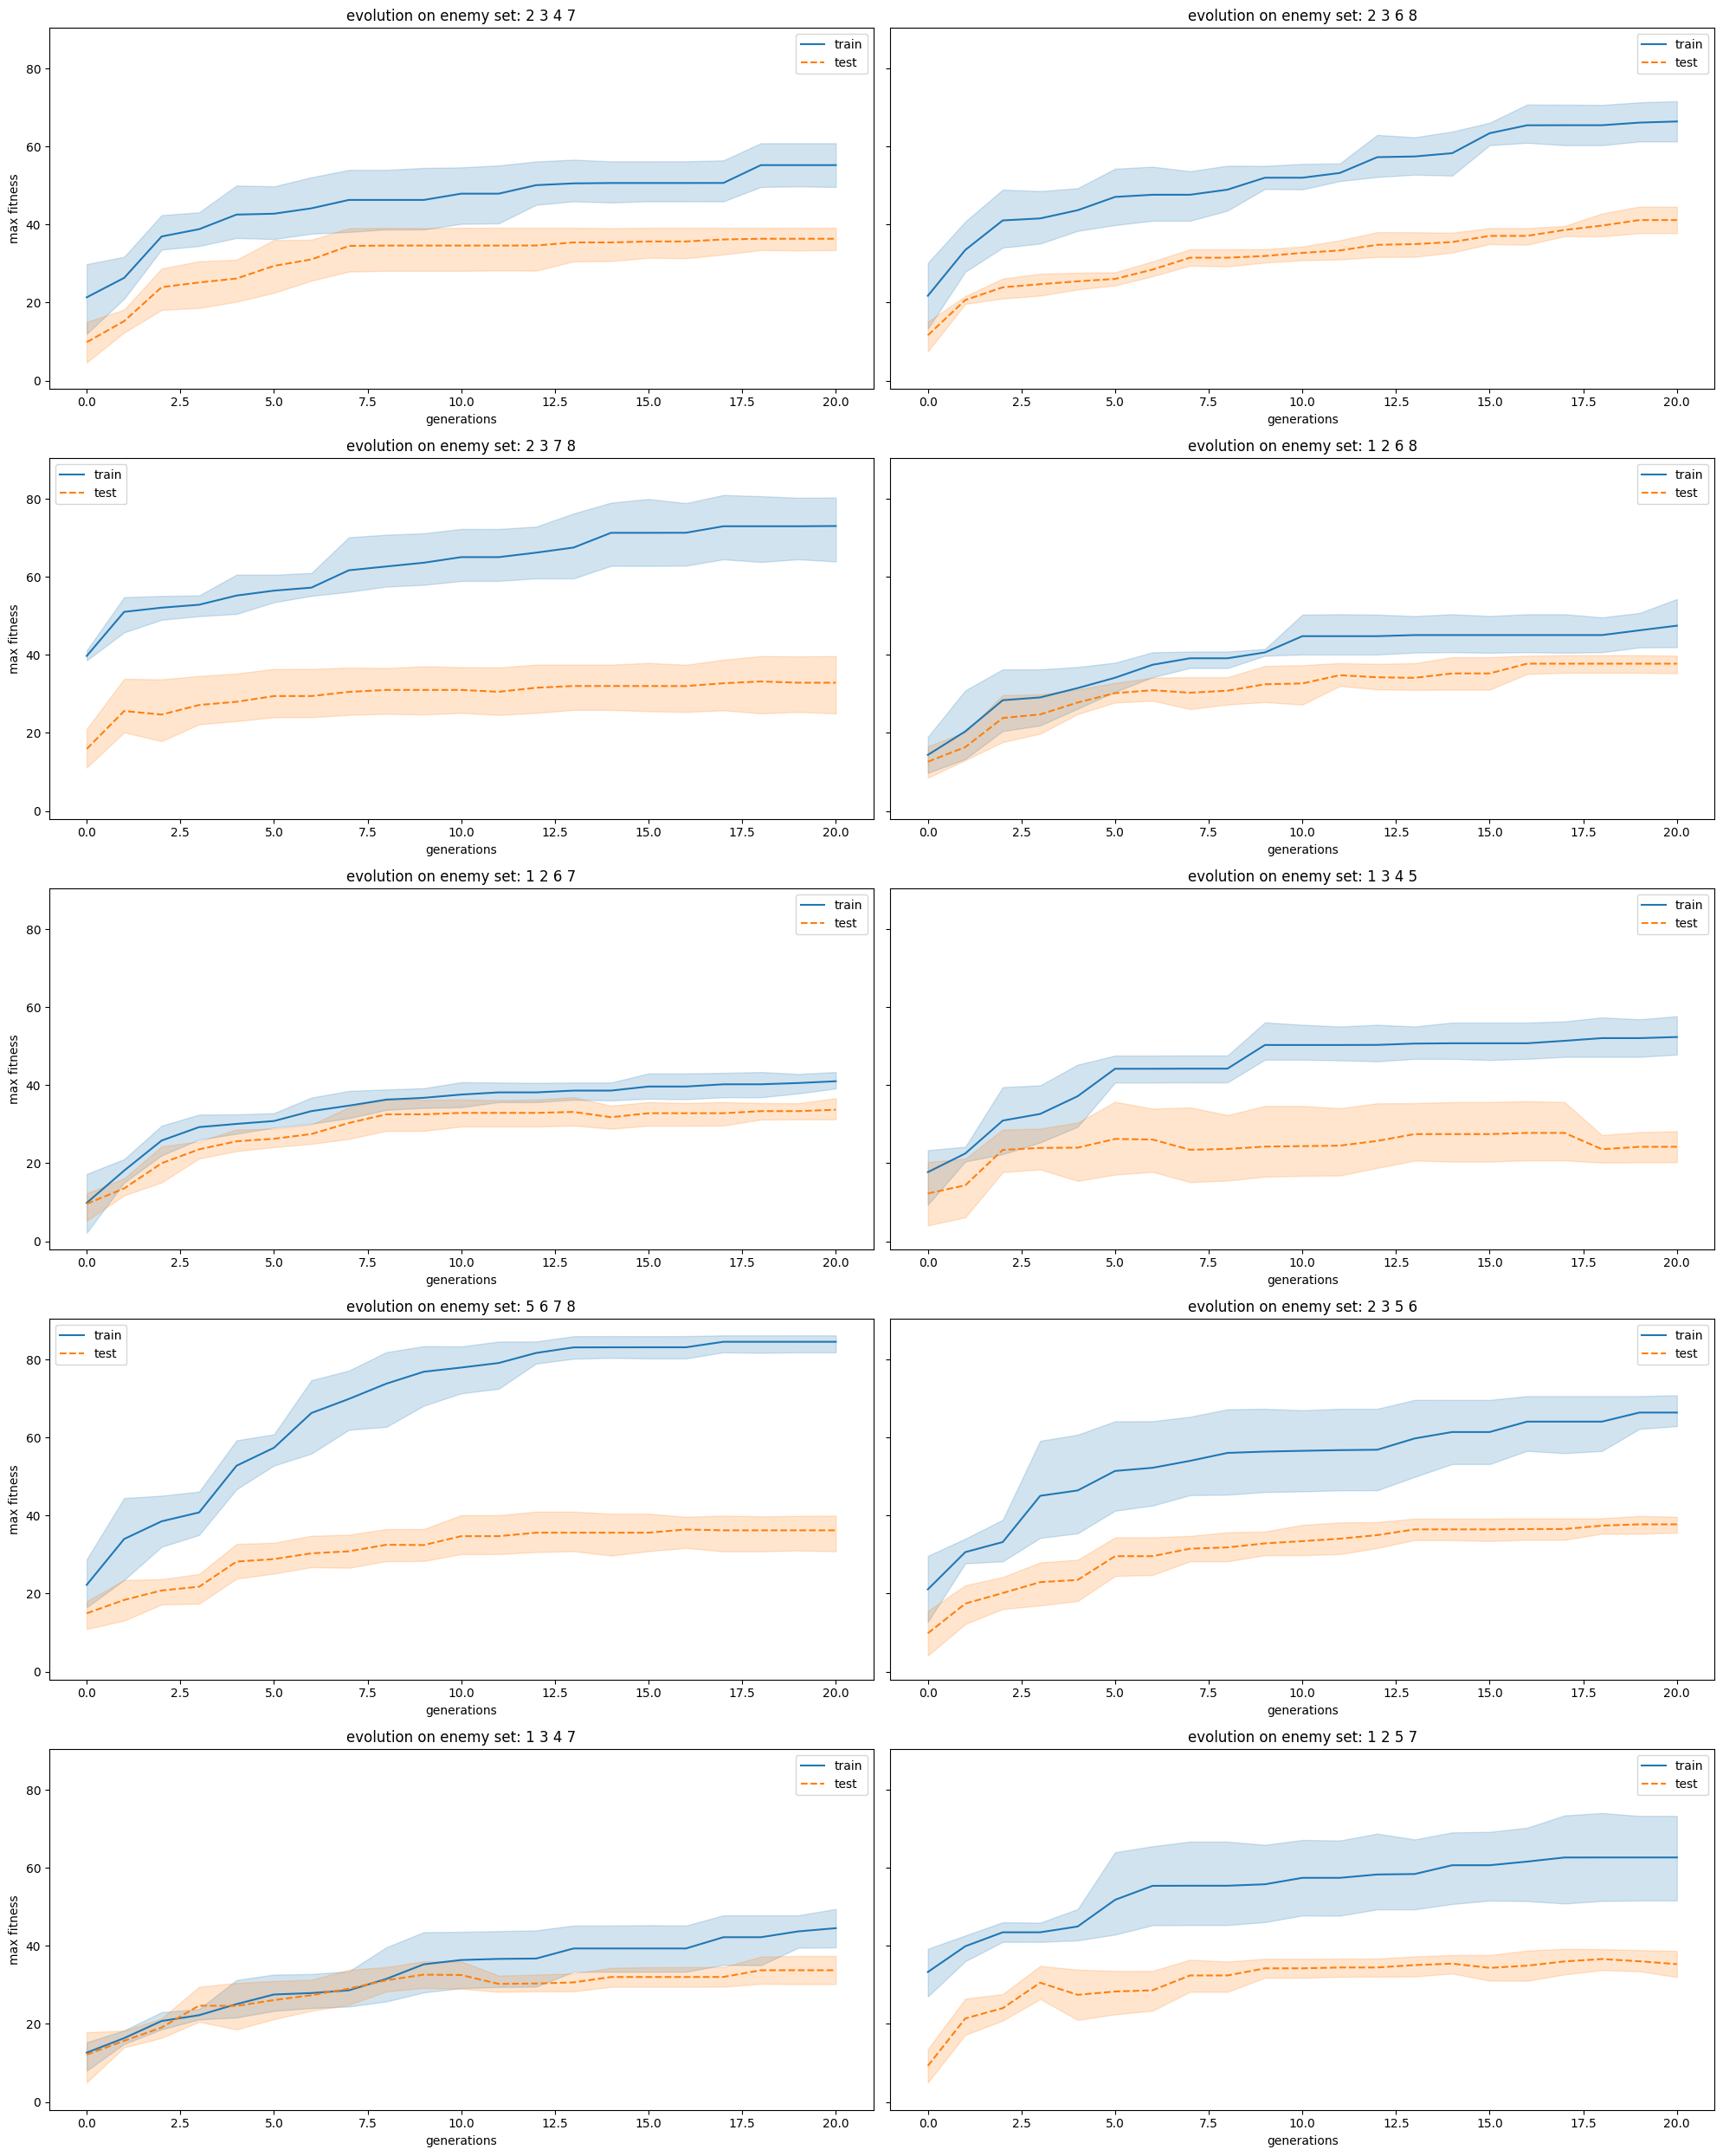

In [14]:
UNIQUE_ENEMIES = df_group['set of enemies'].unique()

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(20, 25), sharey=True)

for i, e_set in enumerate(UNIQUE_ENEMIES):

    ax = axs[int(np.floor(i/2)), i % 2]

    enemy_data = df_group[df_group['set of enemies'] == e_set]

    sns.lineplot(ax = ax, data = enemy_data, x = 'gen', y='train_max.fitness', label = 'train')
    sns.lineplot(ax = ax, data = enemy_data, x = 'gen', y='test_max.fitness', label = 'test', linestyle = 'dashed')
    
    ax.set_title(f'evolution on enemy set: {e_set}')
    ax.set_ylabel('max fitness')
    ax.set_xlabel('generations')

plt.tight_layout()
plt.show()

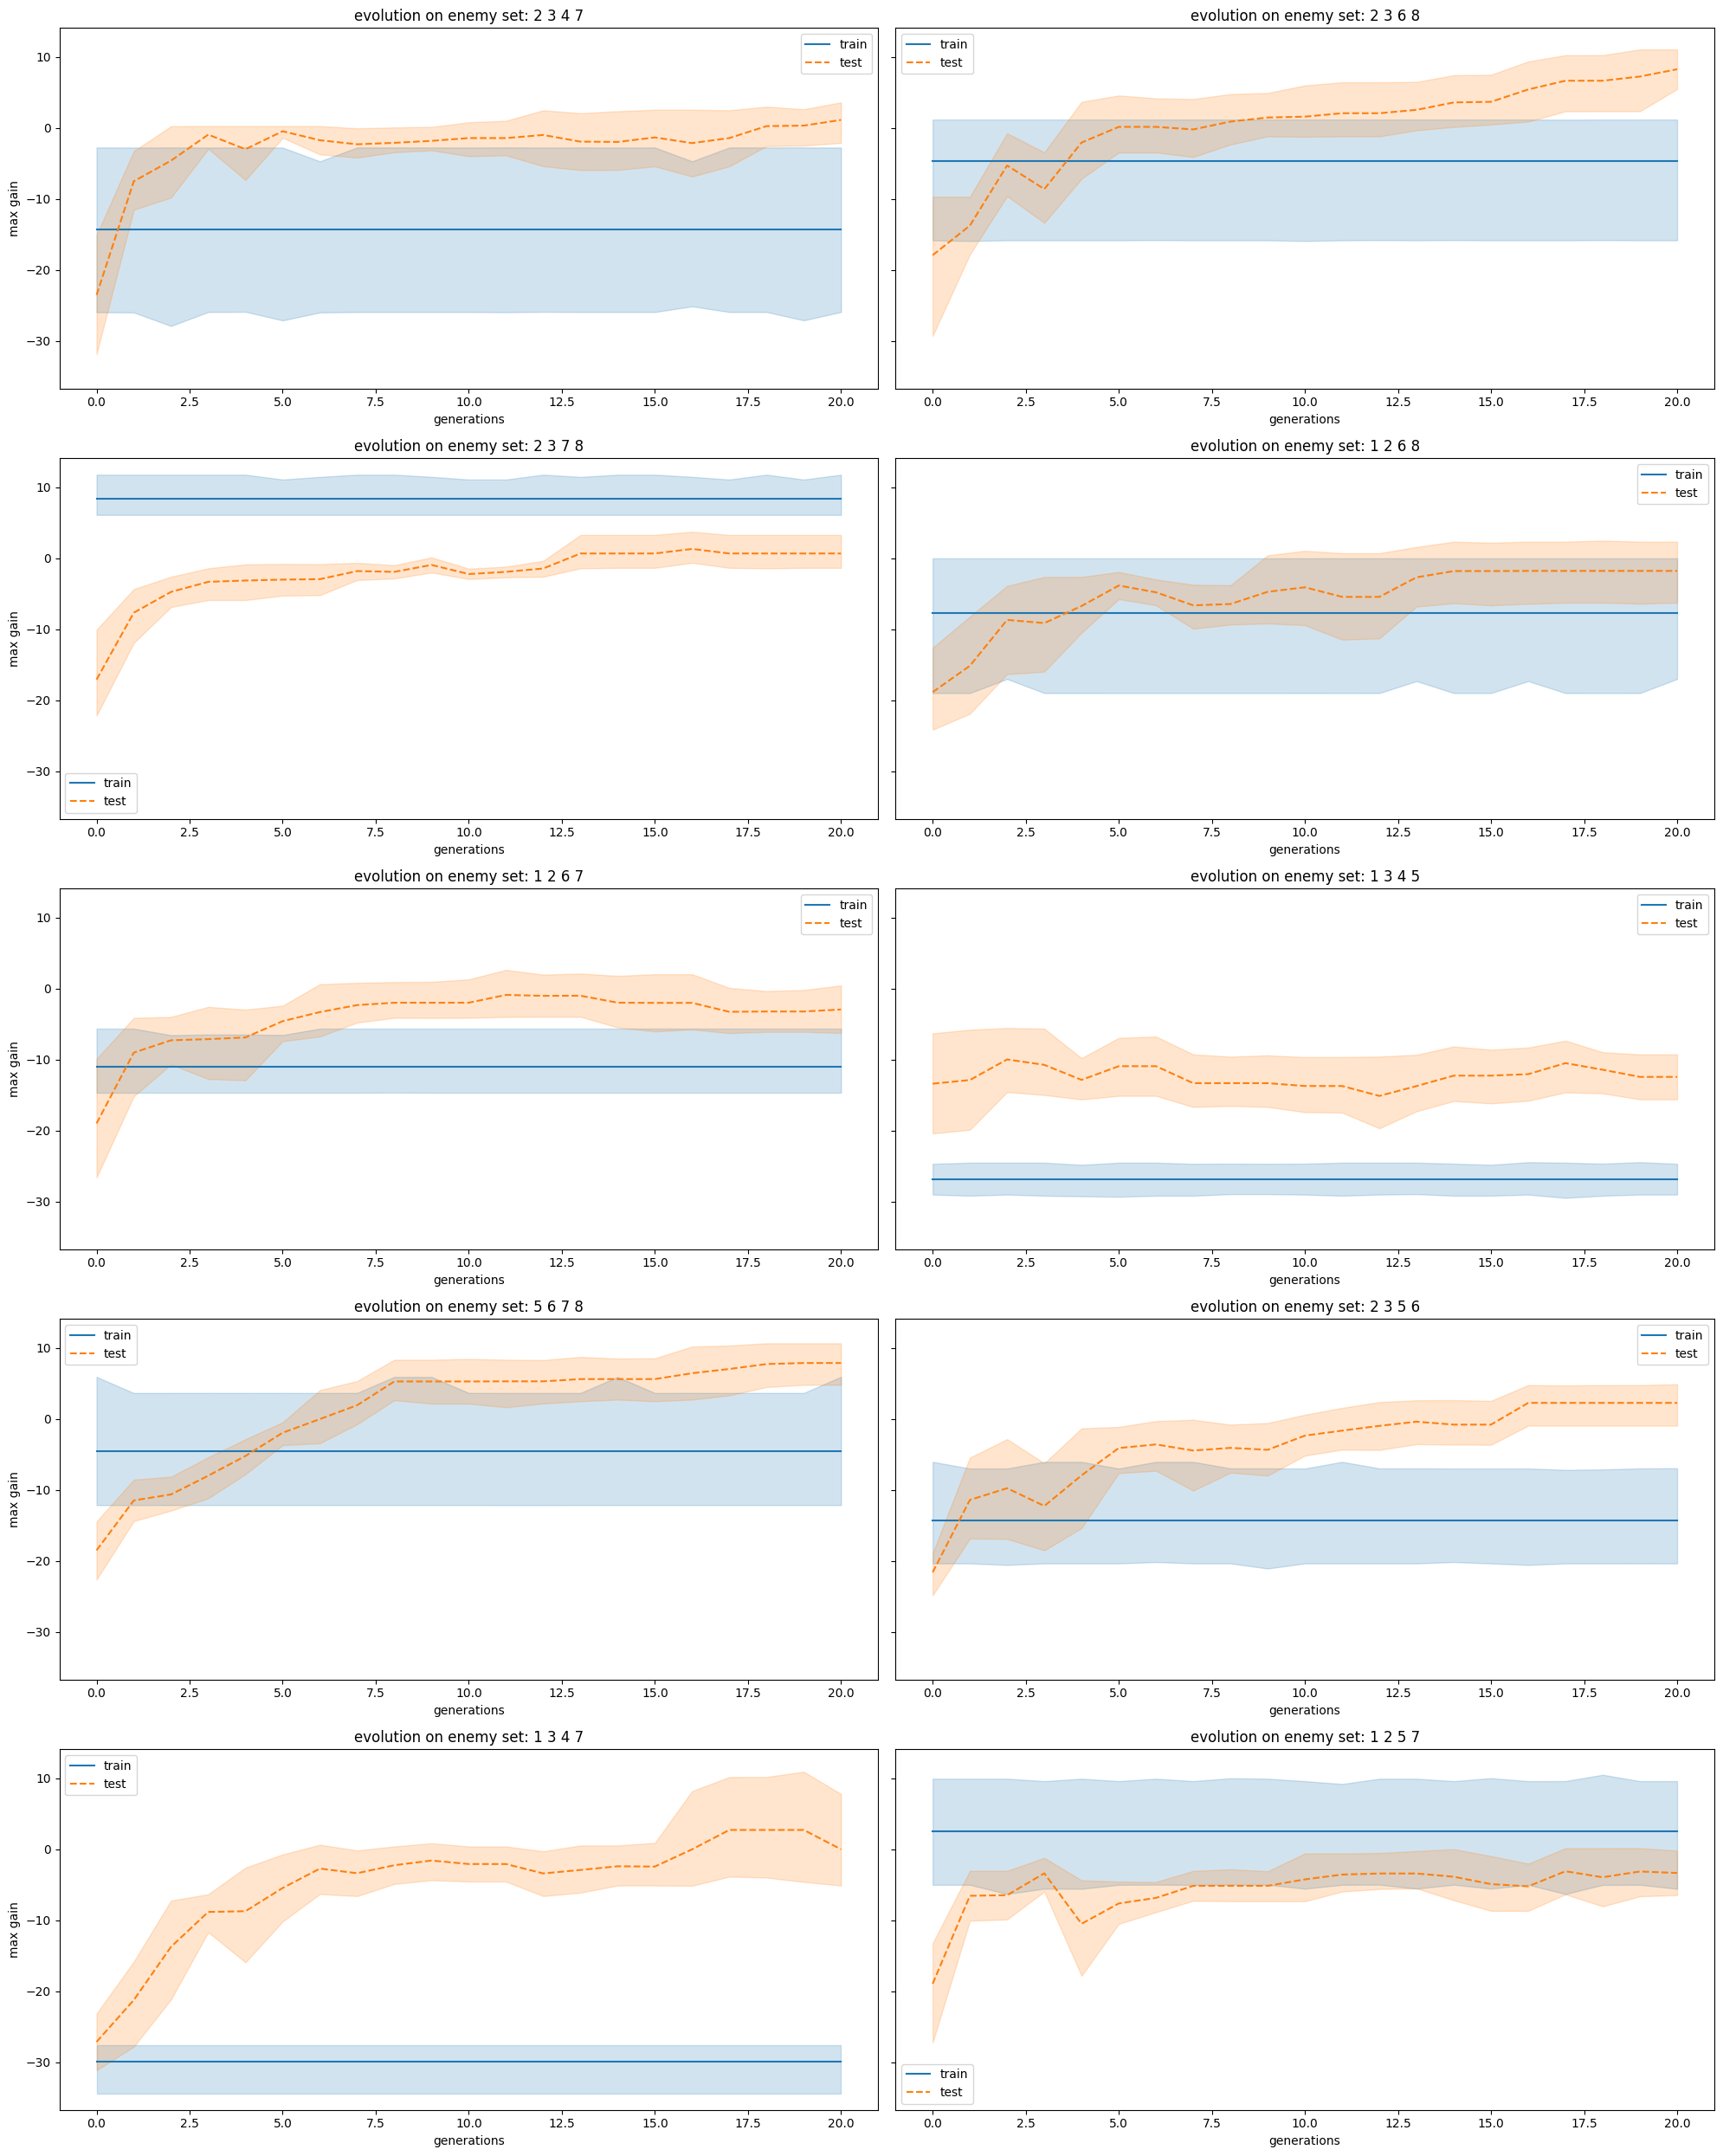

In [15]:
UNIQUE_ENEMIES = df_group['set of enemies'].unique()

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(20, 25), sharey=True)

for i, e_set in enumerate(UNIQUE_ENEMIES):

    ax = axs[int(np.floor(i/2)), i % 2]

    enemy_data = df_group[df_group['set of enemies'] == e_set]

    sns.lineplot(ax = ax, data = enemy_data, x = 'gen', y='train_max.gain', label = 'train')
    sns.lineplot(ax = ax, data = enemy_data, x = 'gen', y='test_max.gain', label = 'test', linestyle = 'dashed')
    
    ax.set_title(f'evolution on enemy set: {e_set}')
    ax.set_ylabel('max gain')
    ax.set_xlabel('generations')

plt.tight_layout()
plt.show()

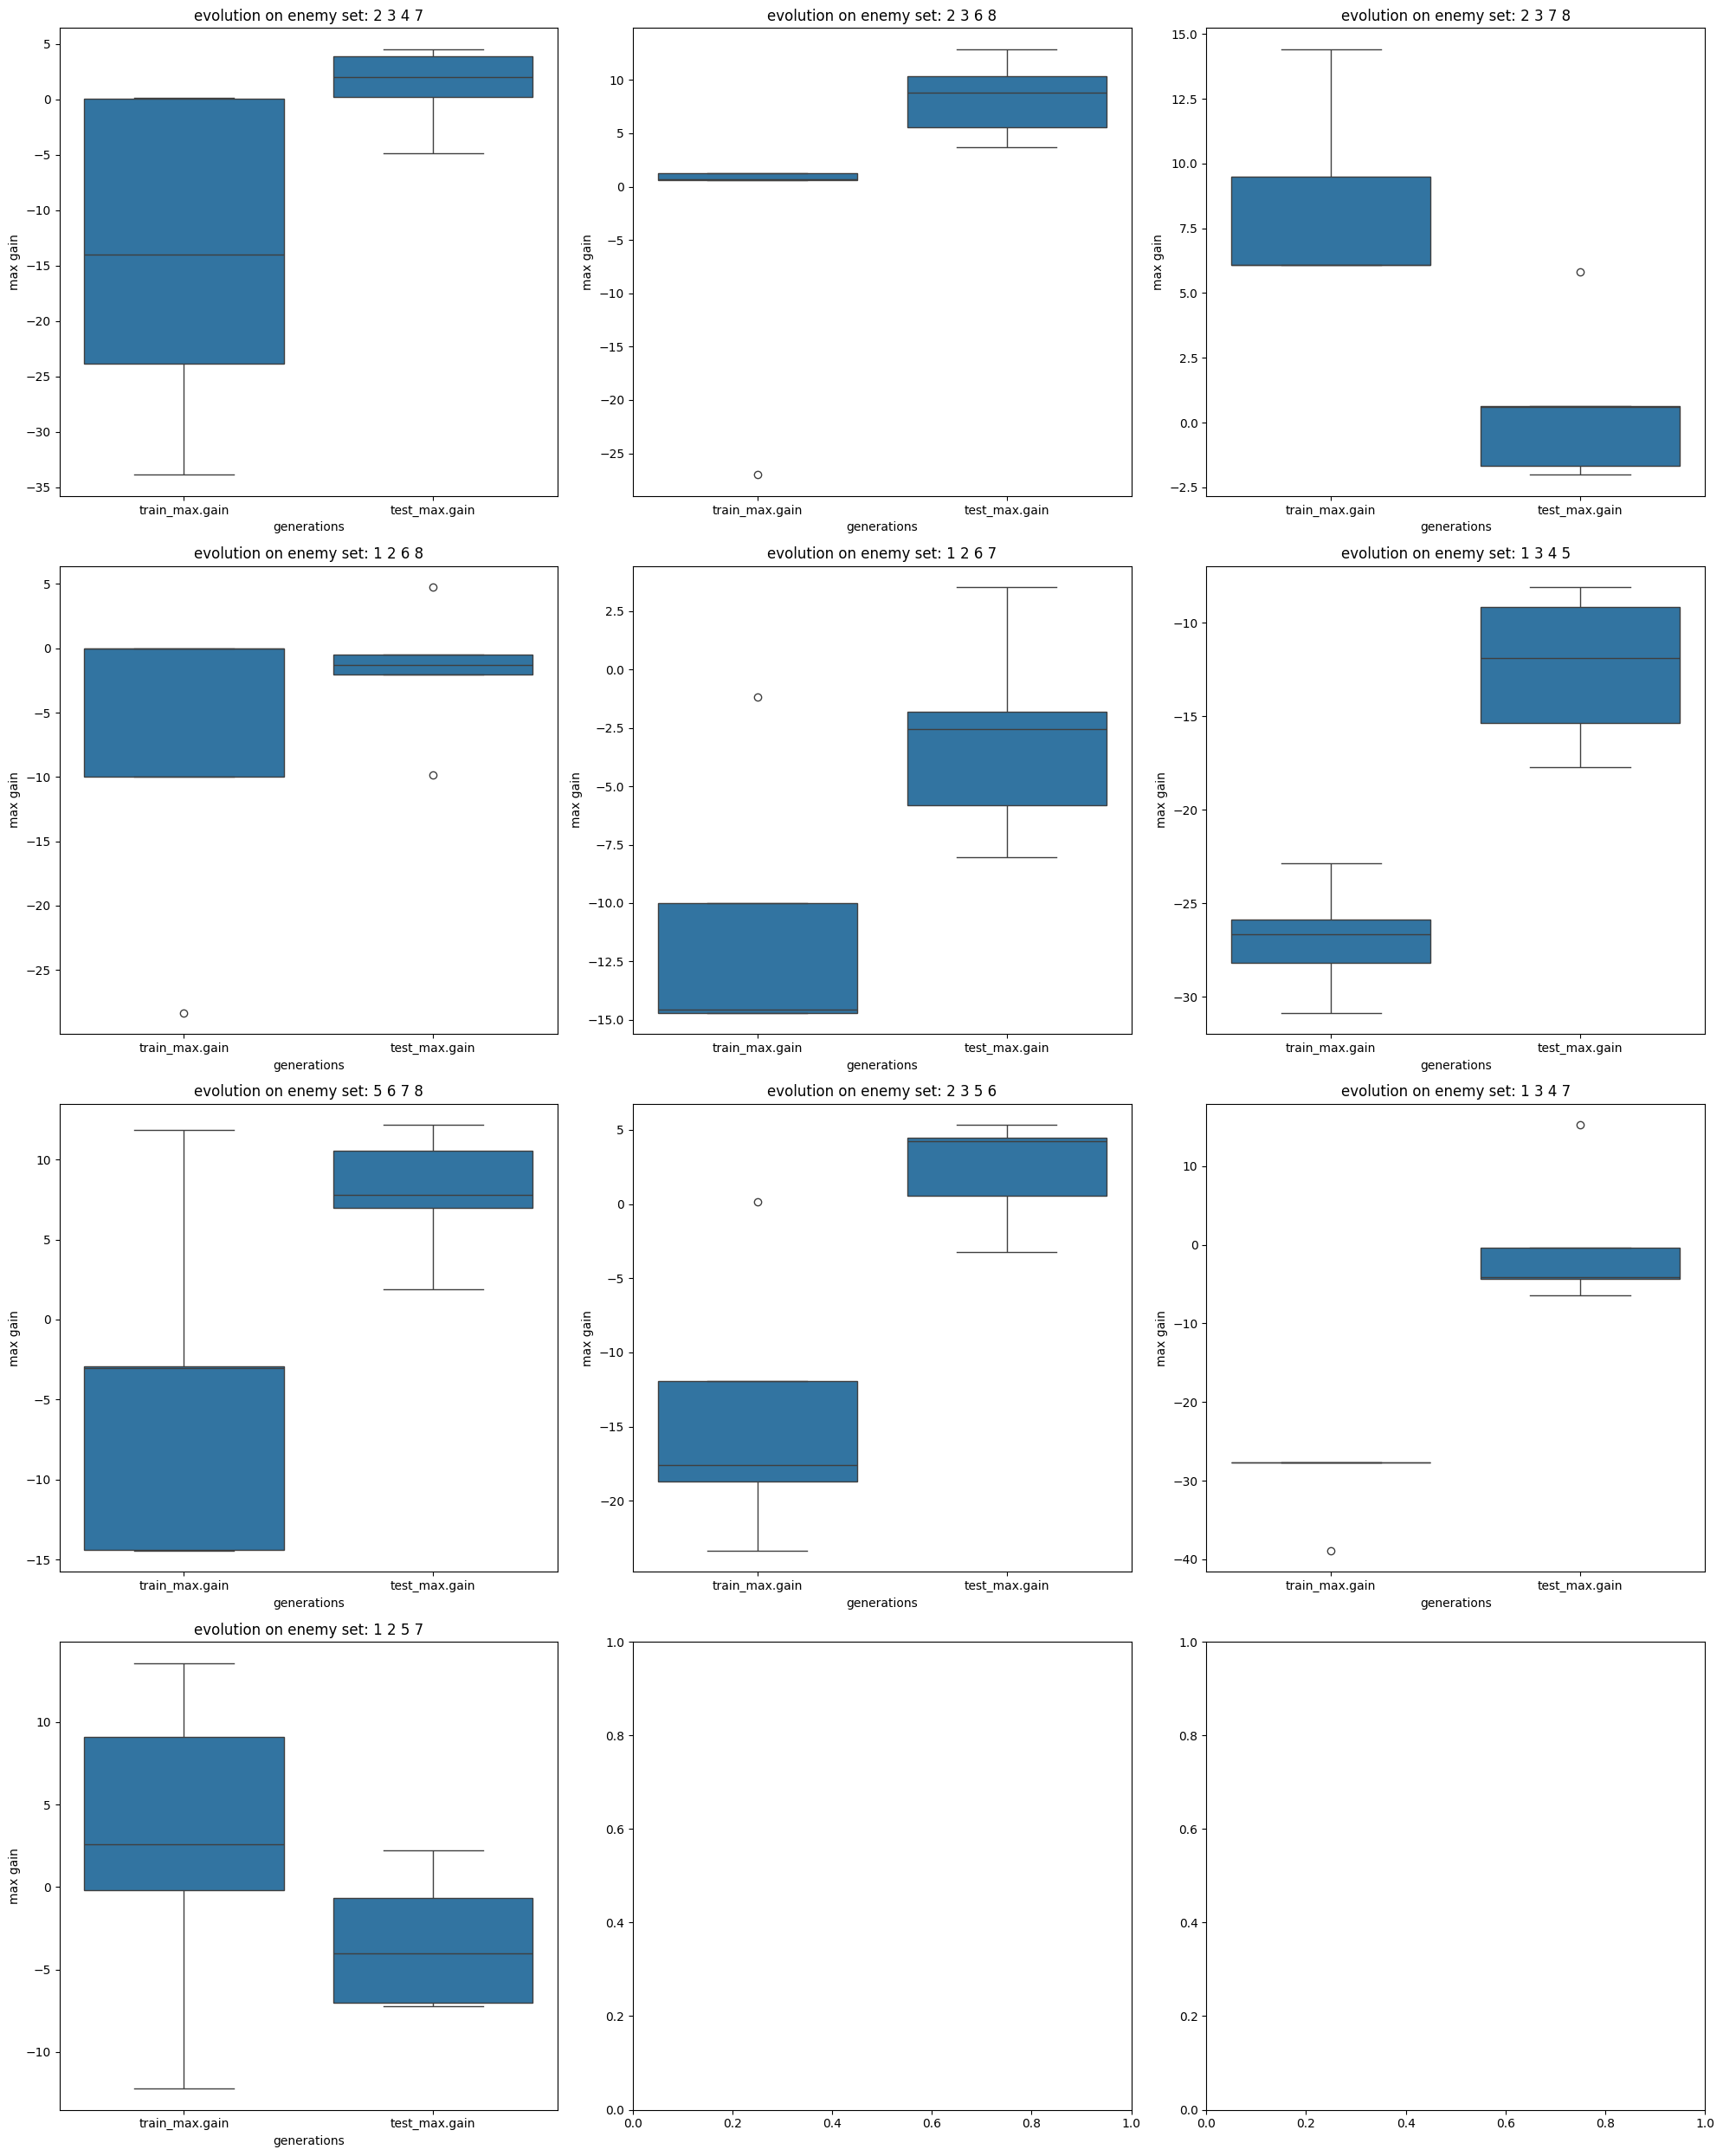

In [16]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20, 25))

for i, e_set in enumerate(UNIQUE_ENEMIES):

    ax = axs[int(np.floor(i/3)), i % 3]

    enemy_data = end_result_df[end_result_df['set of enemies'] == e_set]

    variable = ['train_max.gain', 'test_max.gain']
    values = pd.Series(enemy_data[variable].unstack().droplevel(-1))

    sns.boxplot(ax = ax, x = values.index, y = values)

    ax.set_title(f'evolution on enemy set: {e_set}')
    ax.set_ylabel('max gain')
    ax.set_xlabel('generations')

plt.tight_layout()
plt.show()

In [17]:
# End score

In [18]:
metrics = ['train_max.fitness', 'train_mean.fitness', 'train_min.fitness', 'train_std.fitness',
           'train_max.gain', 'train_mean.gain', 'train_min.gain', 'train_std.gain',
           'test_max.fitness', 'test_mean.fitness', 'test_min.fitness', 'test_std.fitness',
           'test_max.gain', 'test_mean.gain', 'test_min.gain', 'test_std.gain']

end_result_df = df.groupby(['set of enemies', 'run id'])[metrics].last().reset_index(drop=False)

np.round(end_result_df.groupby('set of enemies')[metrics].mean().sort_values('test_max.fitness', ascending=False),2)

,train_max.fitness,train_mean.fitness,train_min.fitness,train_std.fitness,train_max.gain,train_mean.gain,train_min.gain,train_std.gain,test_max.fitness,test_mean.fitness,test_min.fitness,test_std.fitness,test_max.gain,test_mean.gain,test_min.gain,test_std.gain
set of enemies,,,,,,,,,,,,,,,,
2 6 8,80.68,68.84,63.63,4.38,14.95,-80.88,-100.62,32.48,45.56,26.72,14.53,5.87,4.64,-4.40,-17.21,4.53
5 6 8,82.31,67.40,60.36,6.06,5.02,-87.89,-113.28,33.11,41.80,24.62,7.06,7.14,2.47,-7.53,-21.68,5.94
2 3 6 8,66.41,48.93,43.63,5.29,-4.62,-81.95,-100.00,29.39,41.14,26.41,11.96,5.88,8.26,-5.76,-23.55,6.63
1 2 6 8,47.47,35.66,32.06,3.66,-7.66,-83.71,-100.00,27.11,37.74,26.42,9.88,5.86,-1.78,-13.98,-36.90,7.83
2 3 5 6,66.39,51.63,47.24,4.60,-14.29,-86.59,-117.44,32.82,37.74,24.95,10.90,6.29,2.26,-11.40,-24.41,5.45
2 3 4 7,55.22,43.45,39.79,3.77,-14.34,-88.48,-102.75,22.53,36.35,22.30,9.06,6.20,1.13,-11.49,-28.64,6.55
5 6 7 8,84.53,74.83,69.83,4.41,-4.58,-86.53,-117.62,35.02,36.20,26.66,20.04,3.76,7.87,-0.40,-7.48,3.67
6 8,85.00,65.58,55.64,7.77,-12.00,-86.15,-100.00,24.31,35.78,25.28,9.75,5.84,3.98,-8.33,-25.39,6.08
1 2 5 7,62.65,50.71,45.87,3.99,2.57,-85.10,-117.55,37.18,35.32,19.76,7.05,6.09,-3.34,-16.61,-26.50,5.53
